In [1]:
### Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/Research Analysis/final_ordinal_responses.csv")
df.head()

,Hospital,Main Unit,Age,Gender,Ethnicity,Highest Educational Level,Marital Status,Have Children?,No. of Children have,Age of the youngest child,...,STS_Score,CS_Score_zscore,BO_Score_zscore,STS_Score_zscore,CS_Score_tscore,BO_Score_tscore,STS_Score_tscore,CS_Score_category,BO_Score_category,STS_Score_category
0,DMH,Inward Care,29,Female,Sinhala,Diploma in Nursing,Married,Yes,1,Less than 1 yr,...,29,1.399705,-0.297766,-1.714985,63.997050,47.022342,32.850149,High,Average,Low
1,DMH,Inward Care,25,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,40,2.679289,1.361725,0.829966,76.792885,63.617250,58.299664,High,High,High
2,DMH,Inward Care,28,Female,Sinhala,BSc. Nursing,Married,No,999,Not relevant,...,35,-0.732934,-0.771906,-0.326830,42.670659,42.280940,46.731703,Low,Low,Average
3,DMH,Inward Care,43,Female,Sinhala,BSc. (Hons) in Nursing,Married,Yes,3,4 - 7 yrs,...,33,2.679289,0.650515,-0.789548,76.792885,56.505147,42.104518,High,High,Average
4,DMH,Inward Care,28,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,37,1.399705,1.835865,0.135889,63.997050,68.358653,51.358887,High,High,Average


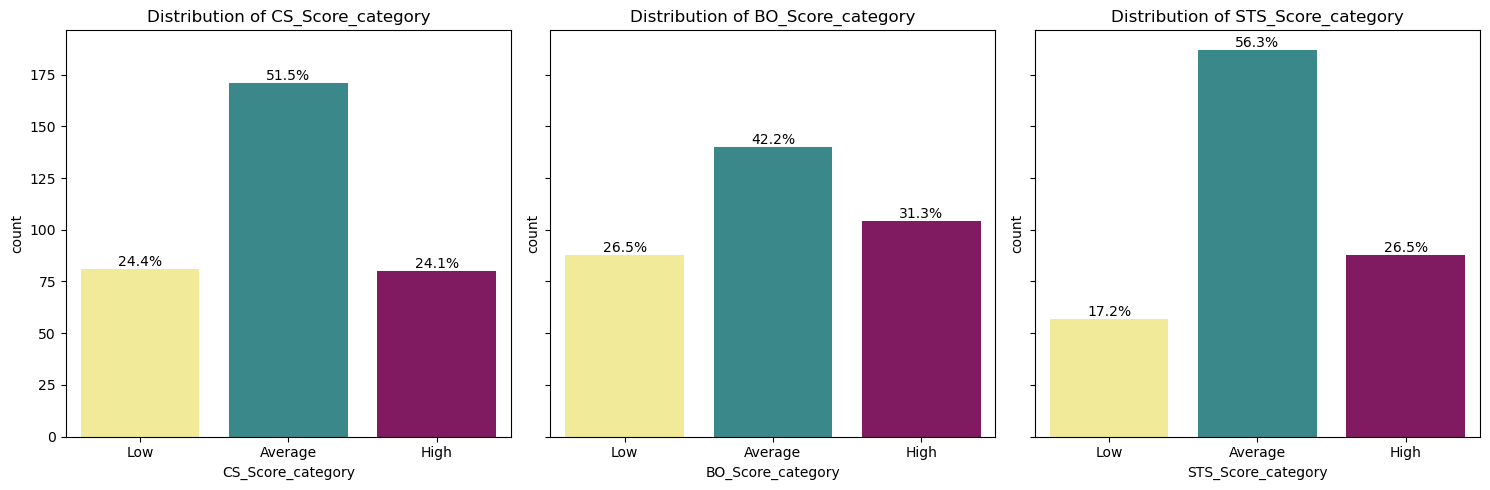

In [3]:
# Set the order of levels for plotting
order = ['Low', 'Average', 'High']

# Define a custom color palette
custom_palette = {'Low': '#FFF78A', 'Average': '#2D9596', 'High': '#910A67'}

# Create subplots for each response variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Loop through response variables and plot bar charts with custom colors
for i, variable in enumerate(['CS_Score_category', 'BO_Score_category', 'STS_Score_category']):
    ax = axes[i]
    sns.countplot(x=variable, data=df, order=order, ax=ax, palette=custom_palette)
    
    # Calculate percentages and annotate the bars
    total = len(df[variable])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    ax.set_title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()

In [4]:
## Nominal variables

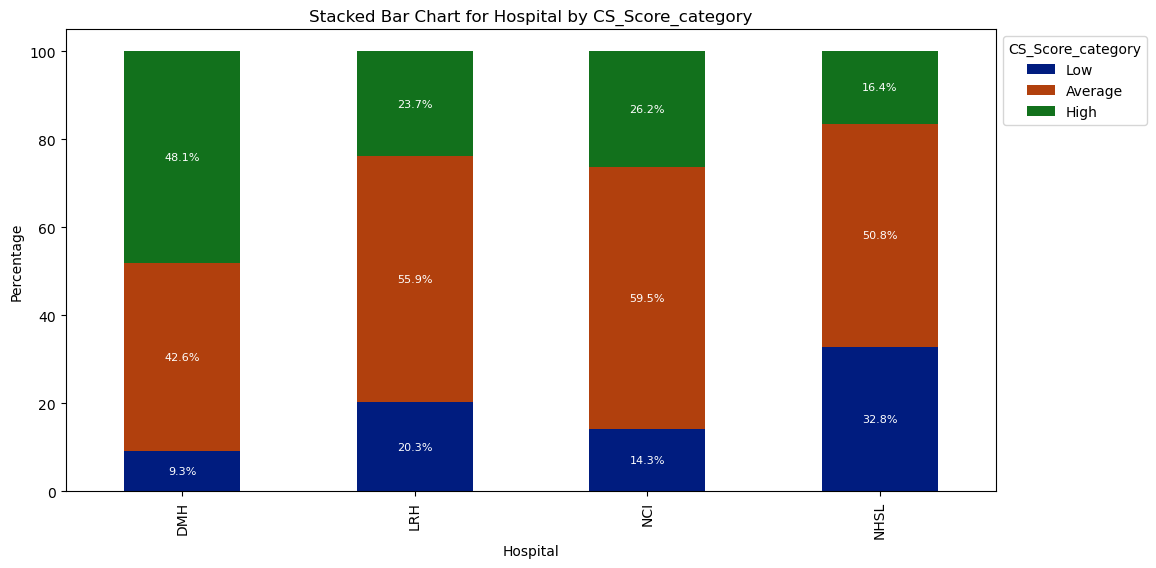

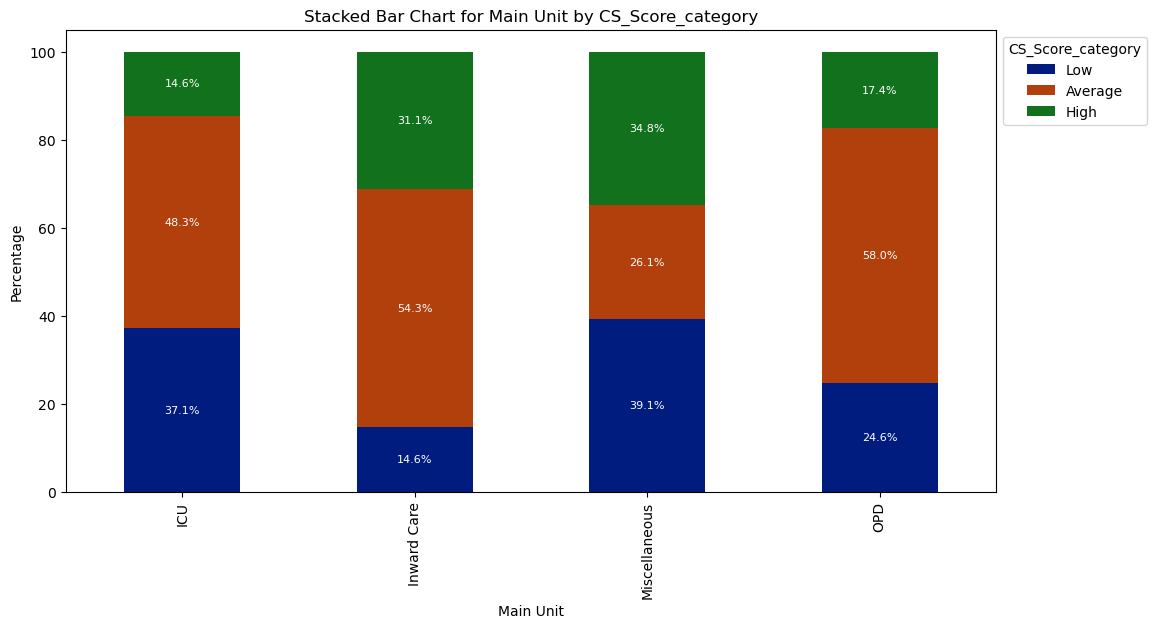

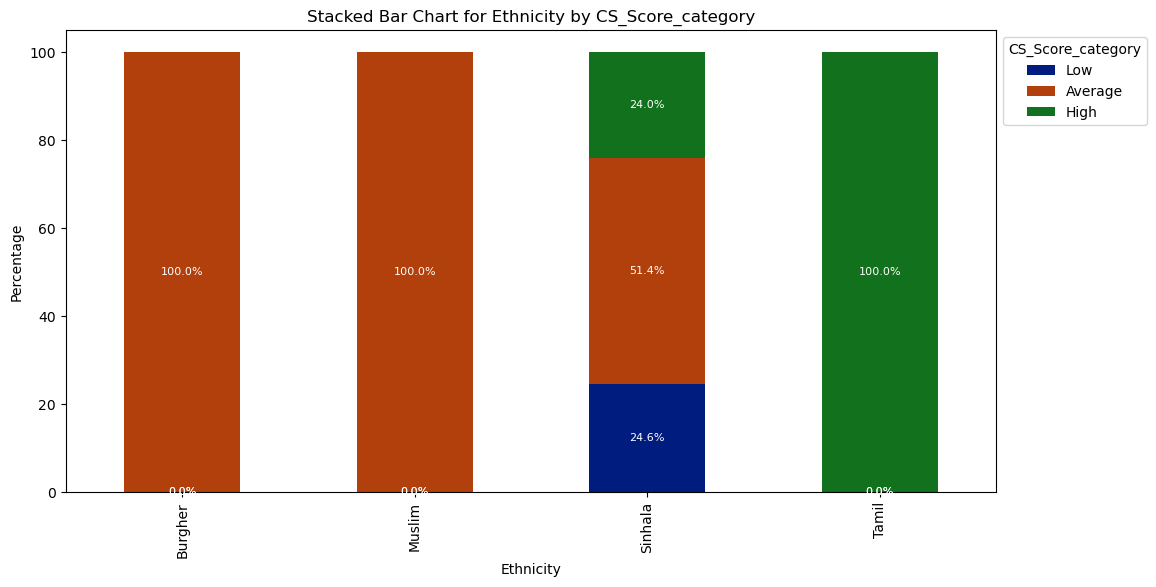

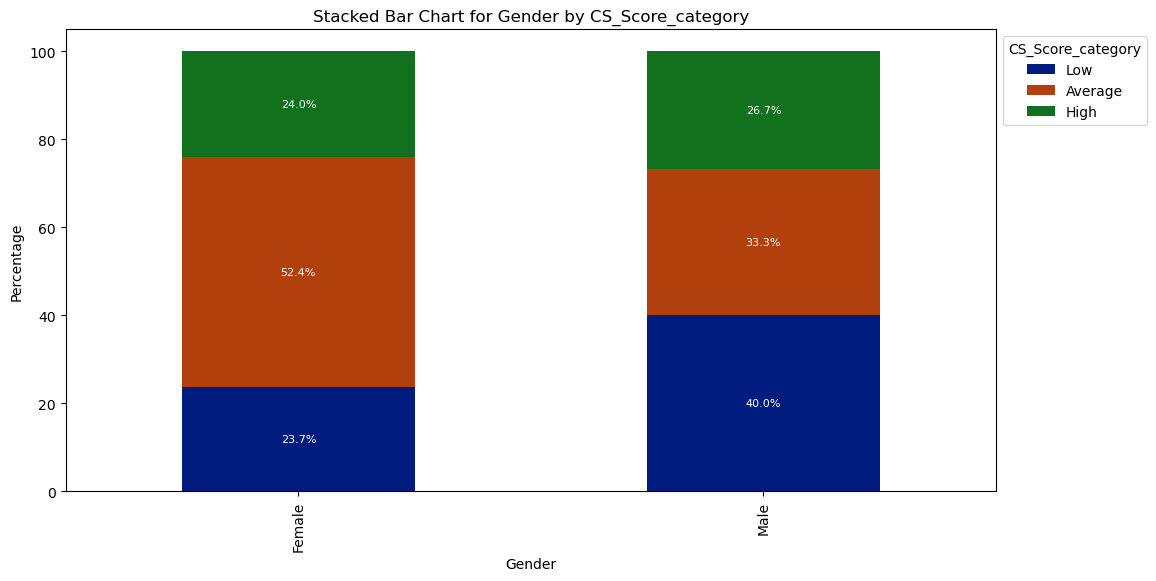

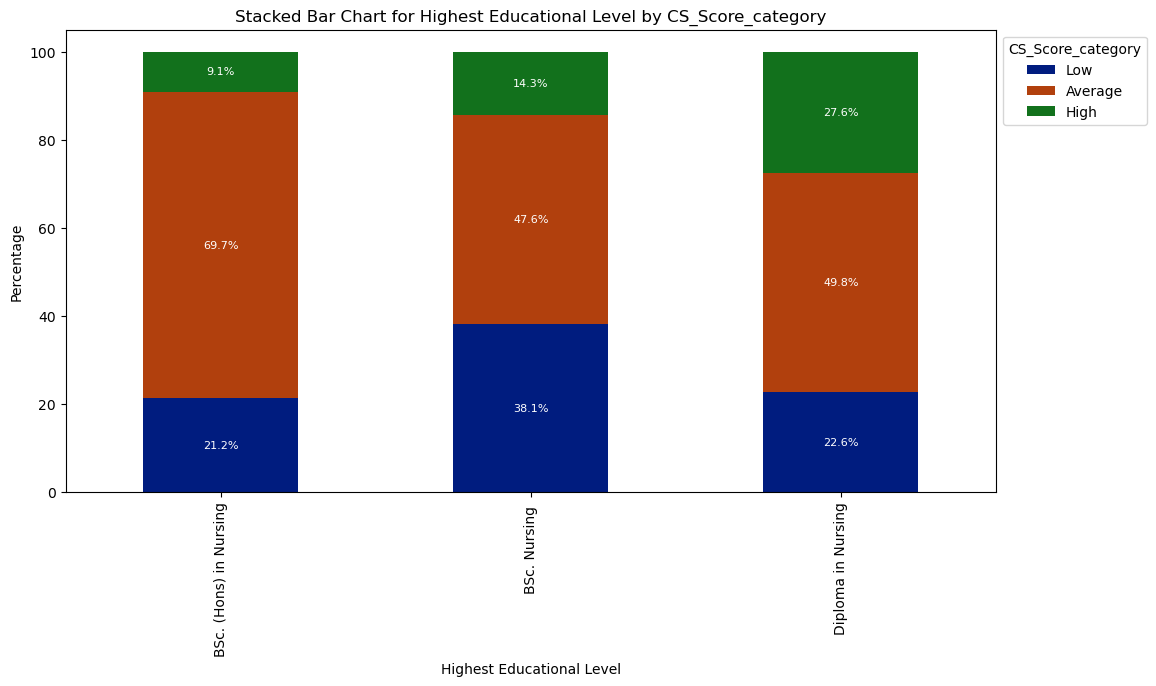

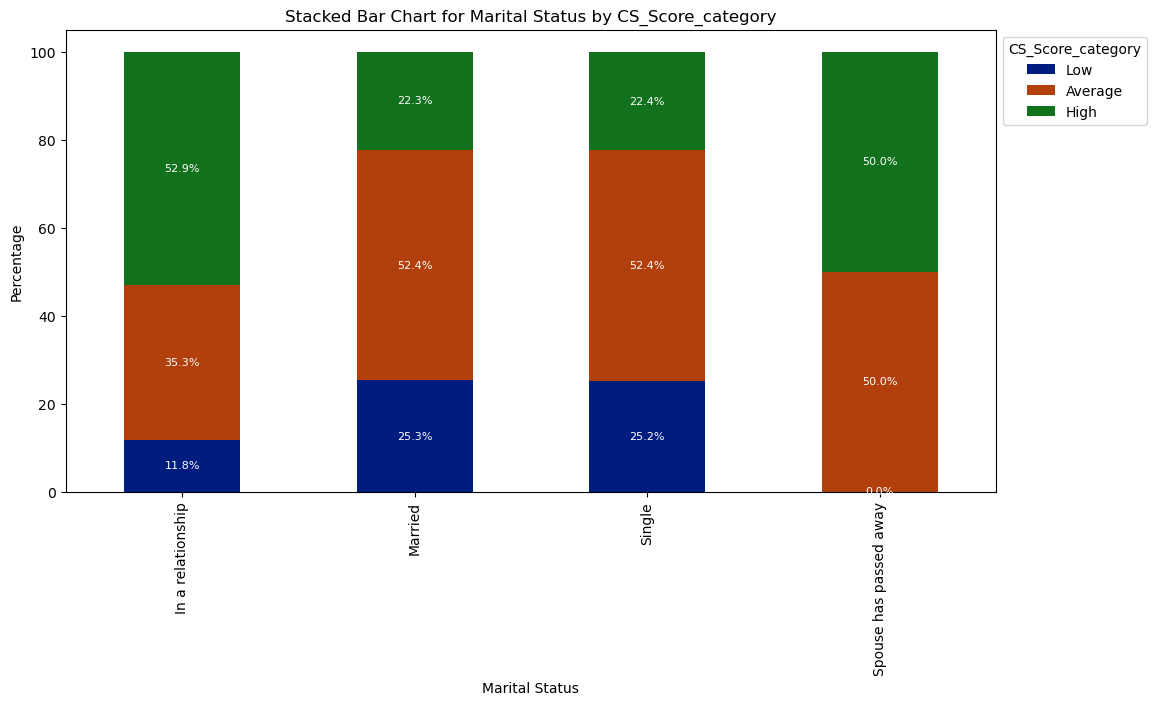

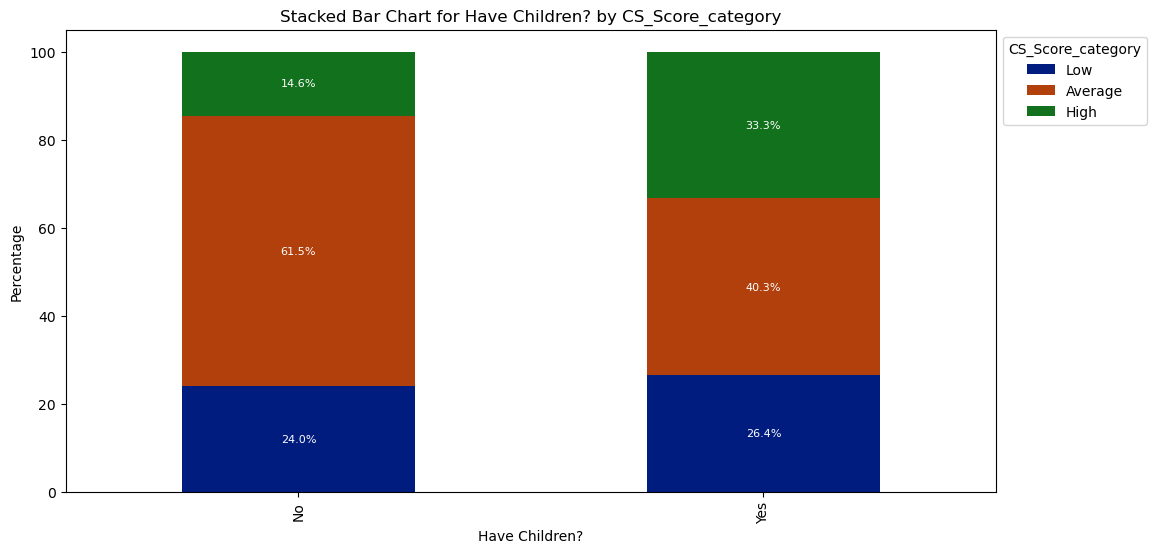

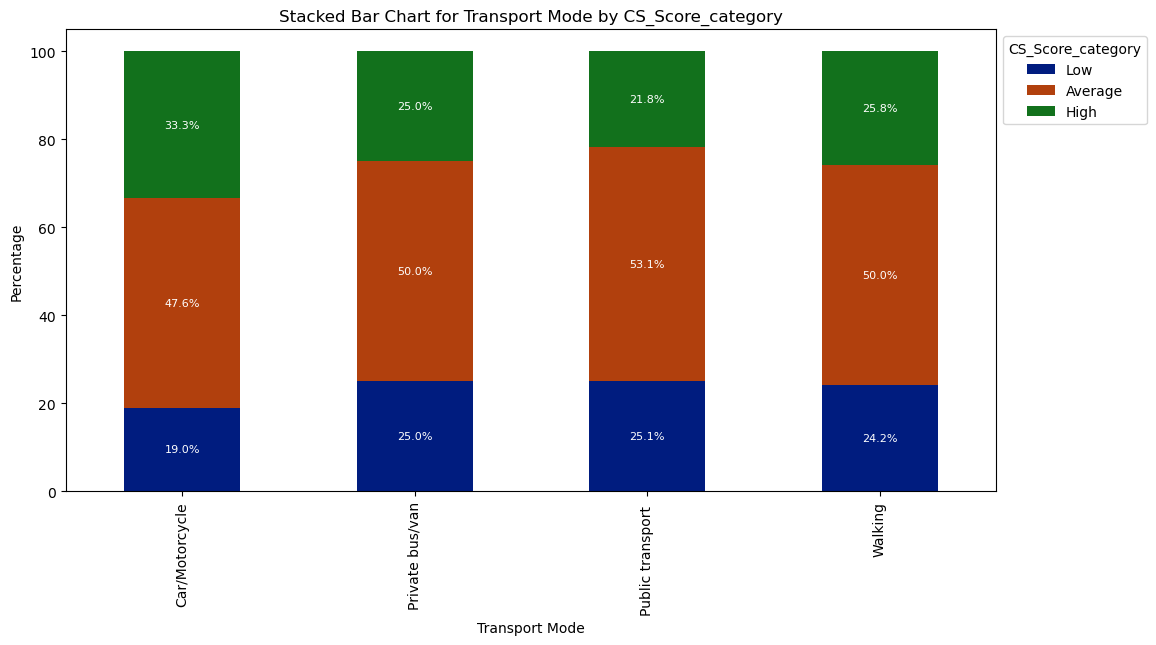

In [6]:
nominal_variables = ['Hospital', 'Main Unit', 'Ethnicity', 'Gender', 'Highest Educational Level', 'Marital Status', 'Have Children?', 'Transport Mode']

# Define dark colors for the stacked bars
dark_colors = sns.color_palette("dark", n_colors=len(df['CS_Score_category'].unique()))

# Define the order of 'CS_Score_category'
cs_score_order = ['Low', 'Average', 'High']

# Loop through each nominal variable and create a stacked bar chart
for nominal_variable in nominal_variables:
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    
    # Filter out rows with 'Not relevant' for the current nominal variable
    filtered_df = df[df[nominal_variable] != 'Not relevant']
    
    # Create a pivot table to calculate the percentage of each CS_Score_category level for the filtered data
    pivot_table = filtered_df.groupby([nominal_variable, 'CS_Score_category']).size().unstack().div(filtered_df.groupby(nominal_variable).size(), axis=0) * 100
    
    # Convert 'CS_Score_category' to a Categorical Series with the specified order
    pivot_table.columns = pd.CategoricalIndex(pivot_table.columns, categories=cs_score_order, ordered=True)
    
    # Sort the columns to ensure the specified order within each bar
    pivot_table = pivot_table[cs_score_order]
    
    # Plot the stacked bar chart with dark colors
    ax = pivot_table.plot(kind='bar', stacked=True, color=dark_colors, ax=plt.gca())
    
    # Add percentage labels to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')
    
    # Set plot labels and title
    plt.xlabel(nominal_variable)
    plt.ylabel('Percentage')
    plt.title(f'Stacked Bar Chart for {nominal_variable} by CS_Score_category')
    plt.legend(title='CS_Score_category', bbox_to_anchor=(1, 1))
    
    # Show the plot
    plt.show()

<Figure size 1800x600 with 0 Axes>

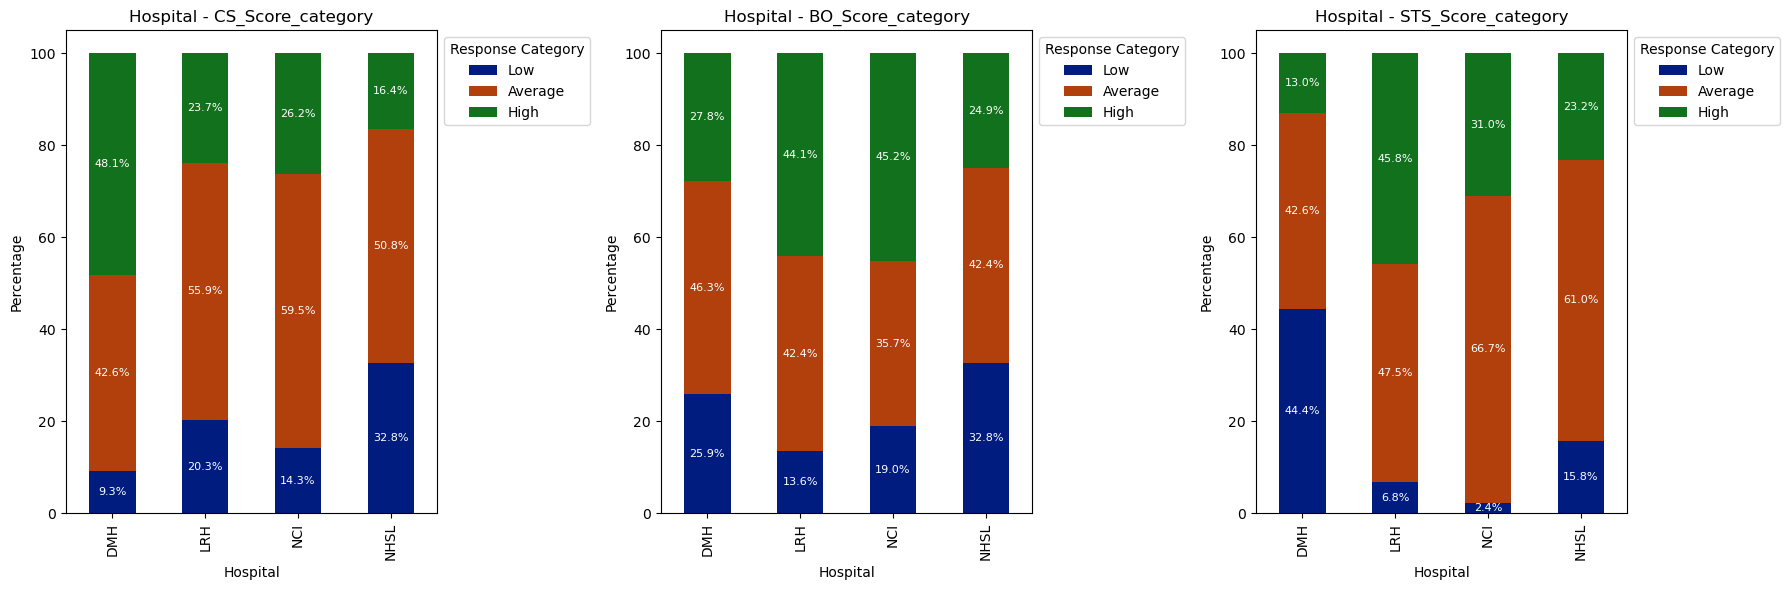

<Figure size 1800x600 with 0 Axes>

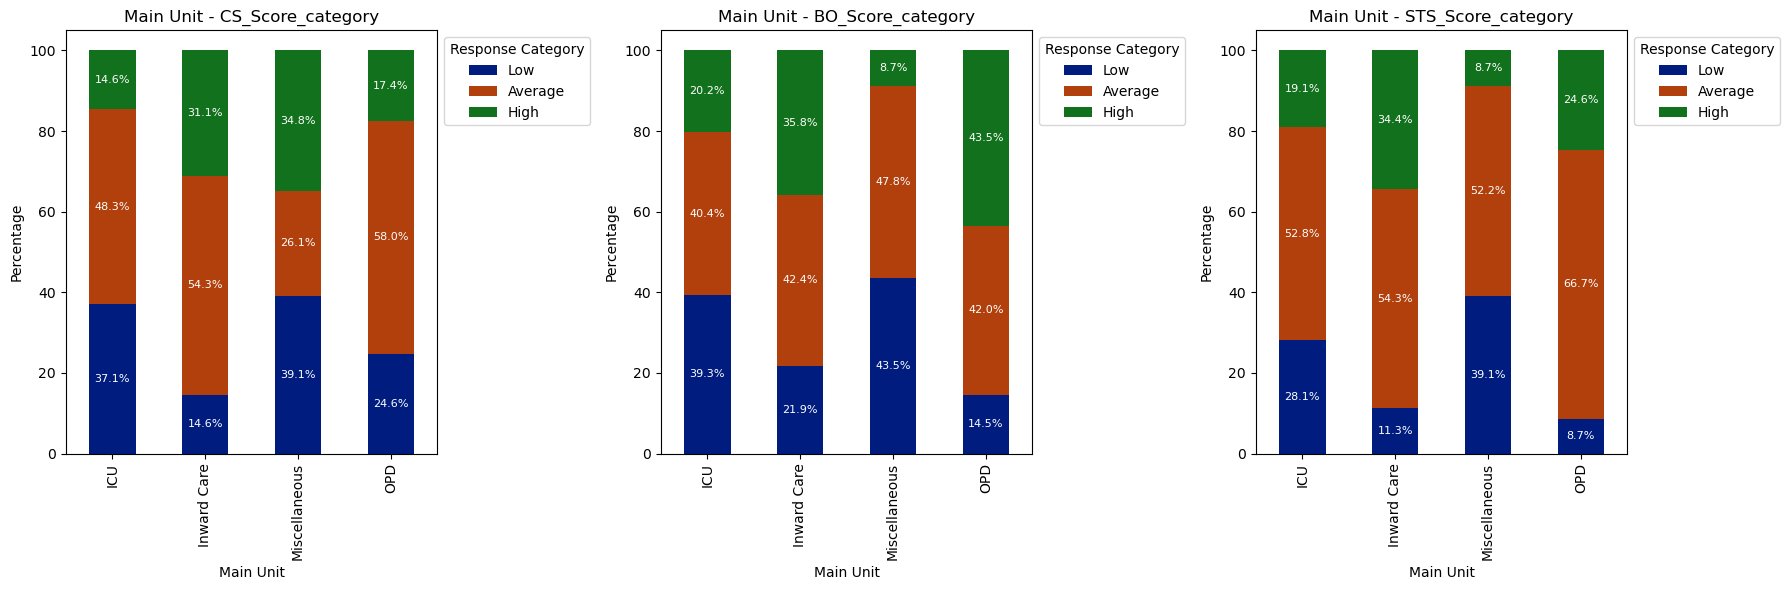

<Figure size 1800x600 with 0 Axes>

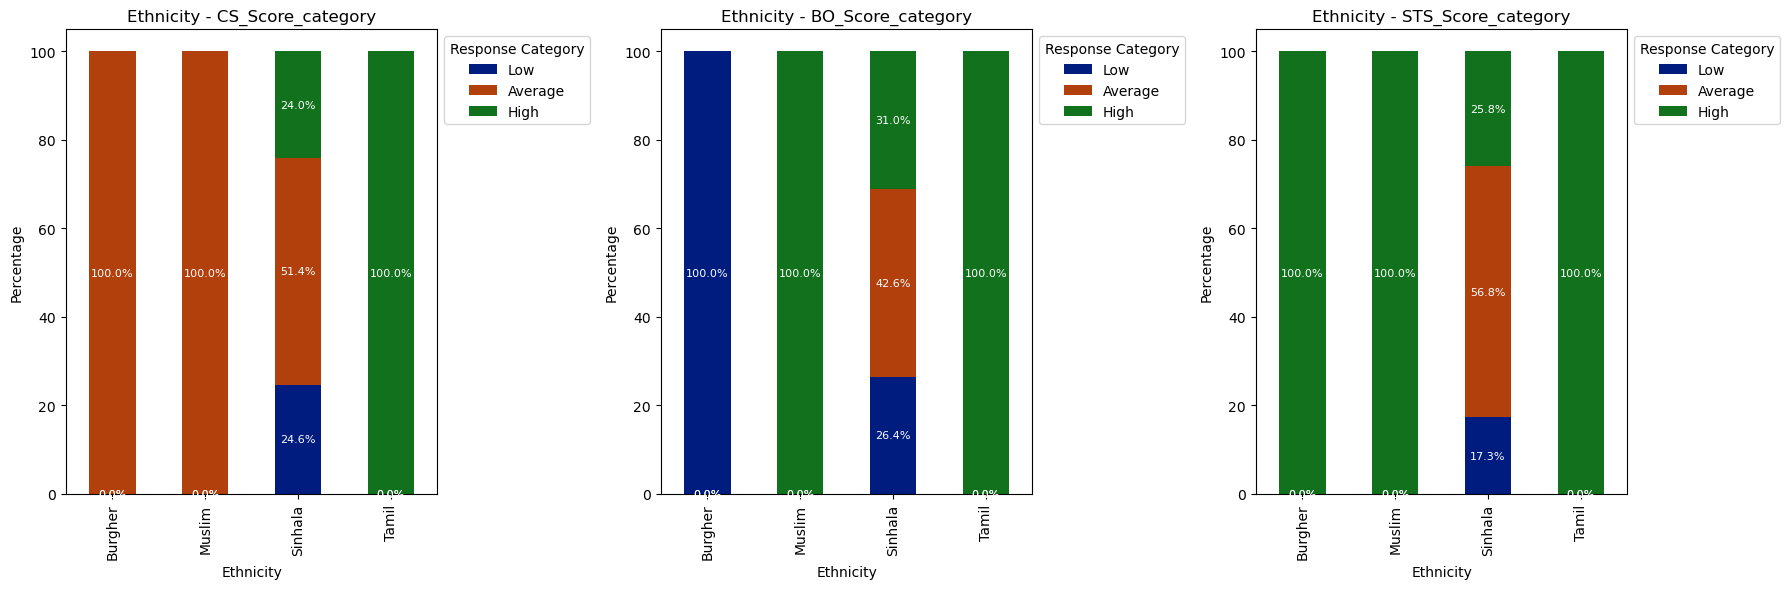

<Figure size 1800x600 with 0 Axes>

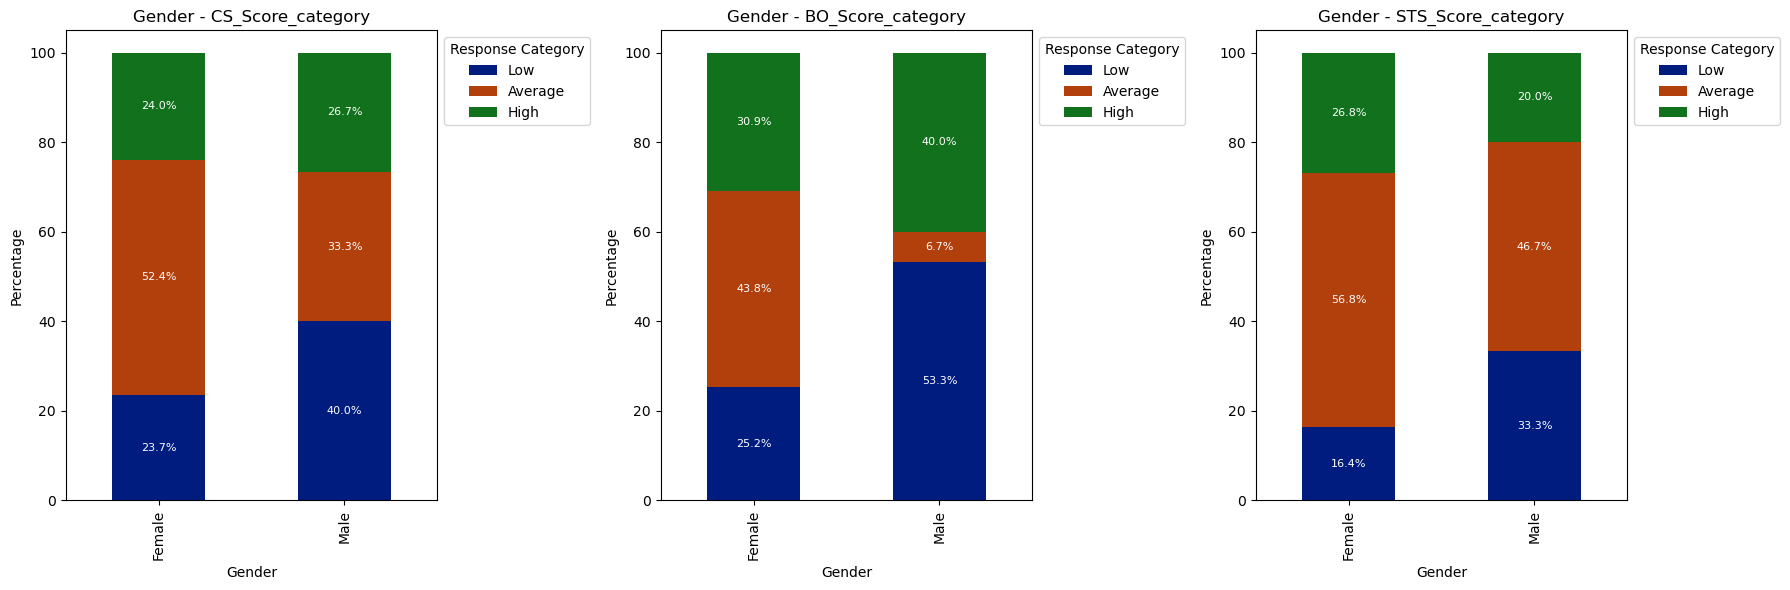

<Figure size 1800x600 with 0 Axes>

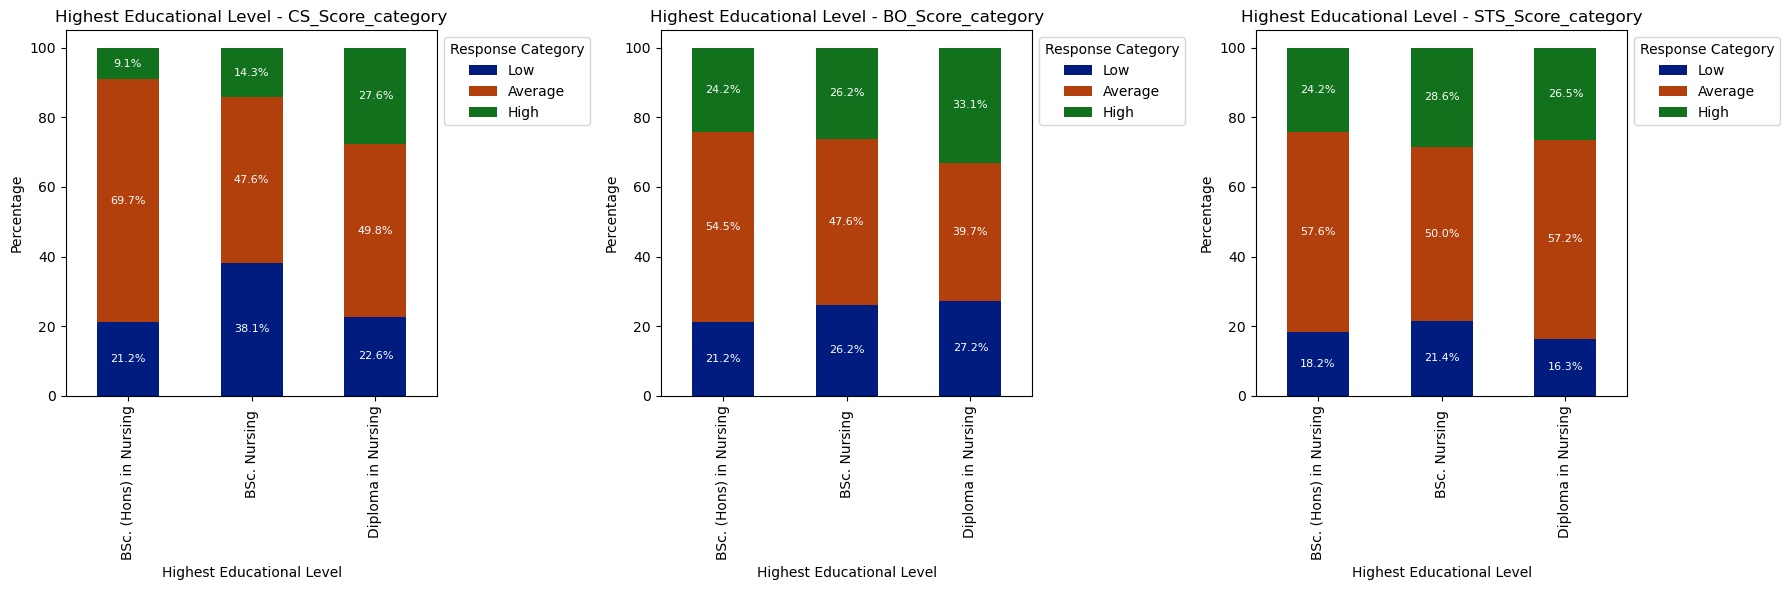

<Figure size 1800x600 with 0 Axes>

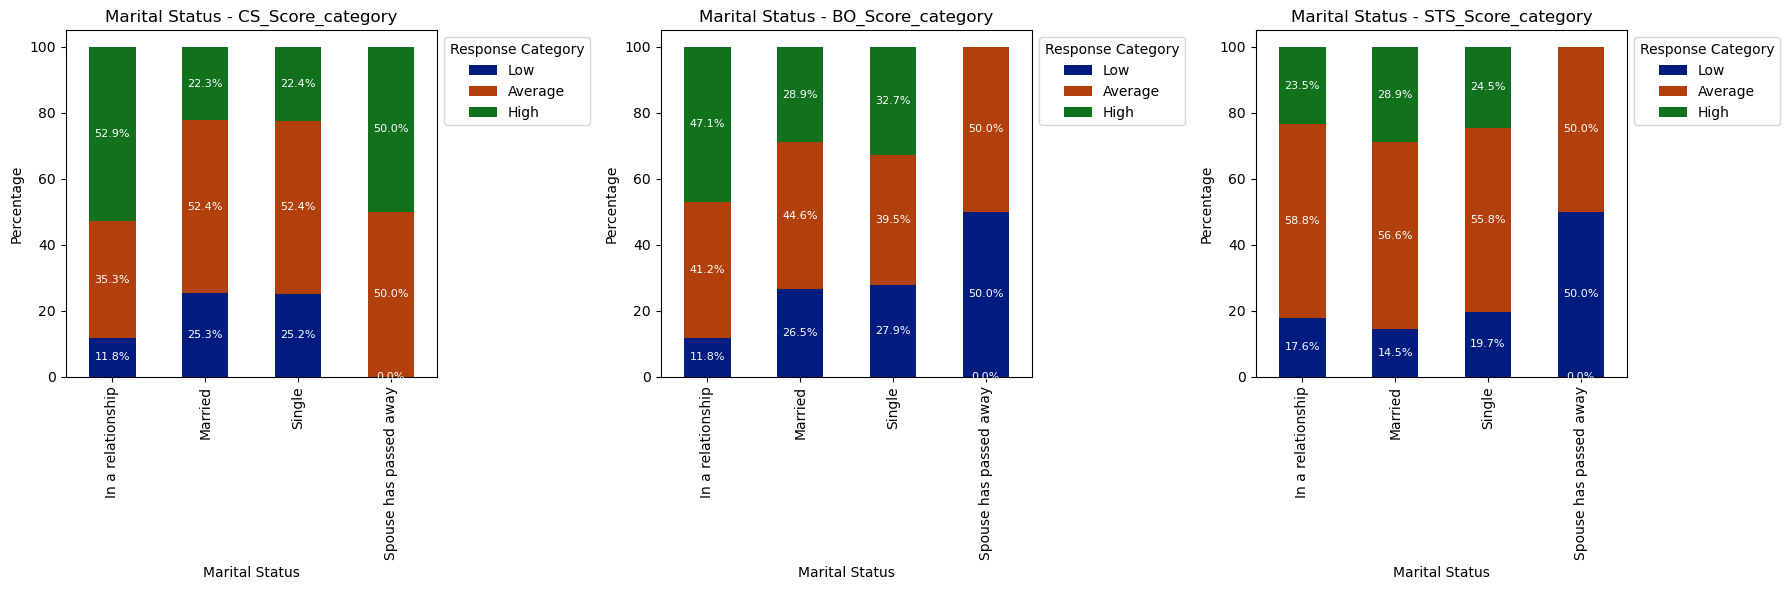

<Figure size 1800x600 with 0 Axes>

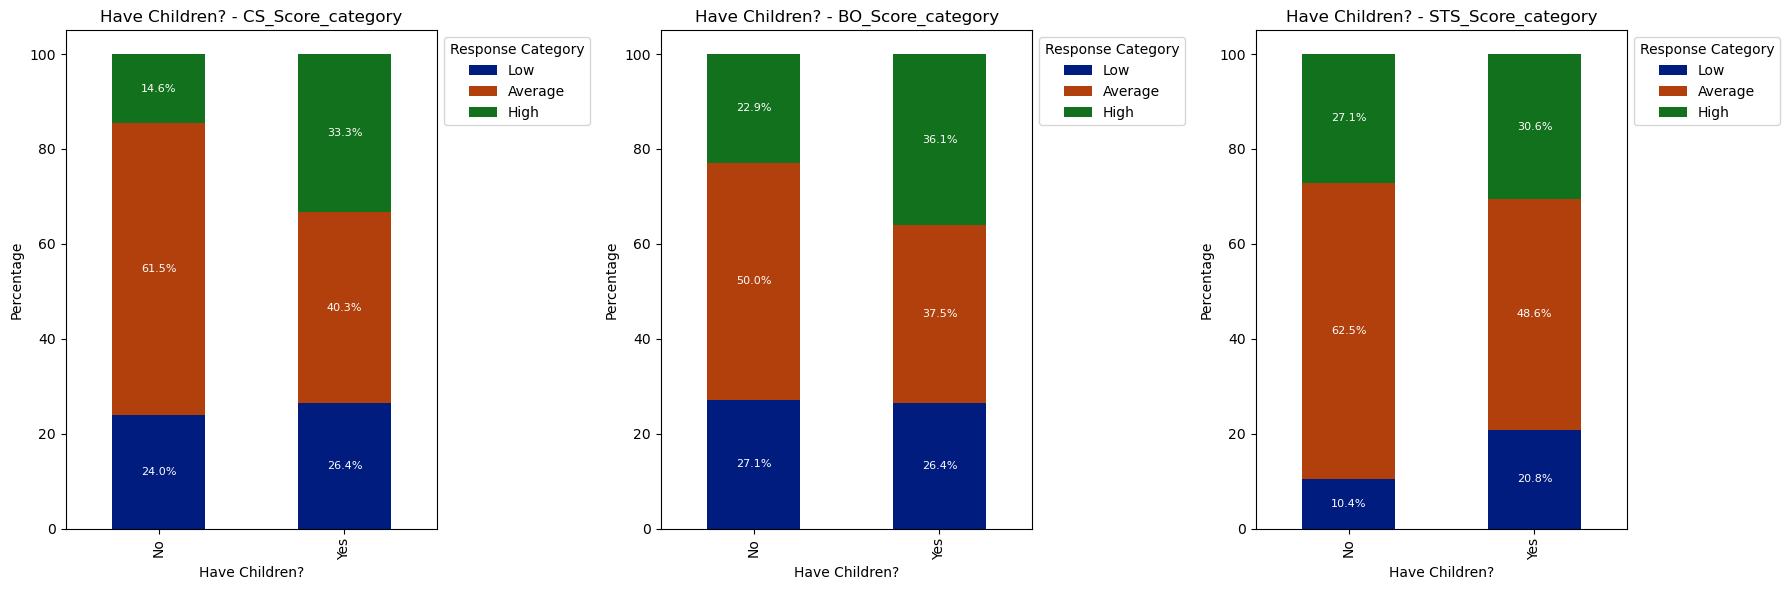

<Figure size 1800x600 with 0 Axes>

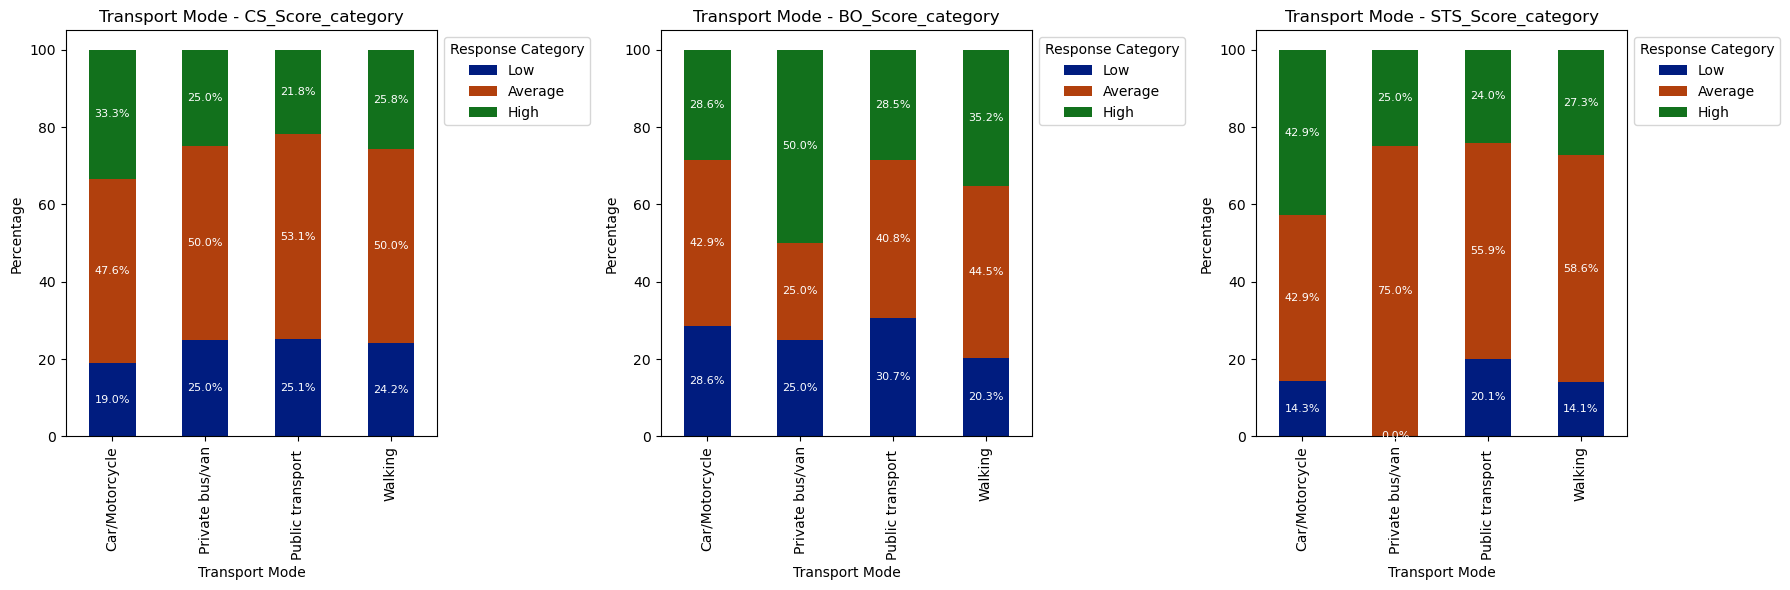

In [19]:
nominal_variables = ['Hospital', 'Main Unit', 'Ethnicity', 'Gender', 'Highest Educational Level', 'Marital Status', 'Have Children?', 'Transport Mode']

# Define dark colors for the stacked bars
dark_colors = sns.color_palette("dark", n_colors=len(order))

# Define the order of ordinal response variables
ordinal_response_variables = ['CS_Score_category', 'BO_Score_category', 'STS_Score_category']
order = ['Low', 'Average', 'High']

# Loop through each nominal variable and create stacked bar charts for ordinal response variables
for nominal_variable in nominal_variables:
    plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
    
    # Filter out rows with 'Not relevant' for the current nominal variable
    filtered_df = df[df[nominal_variable] != 'Not relevant']
    
    # Create pivot tables for each ordinal response variable
    pivot_tables = []
    for response_variable in ordinal_response_variables:
        pivot_table = filtered_df.groupby([nominal_variable, response_variable]).size().unstack().div(filtered_df.groupby(nominal_variable).size(), axis=0) * 100
        pivot_table.columns = pd.CategoricalIndex(pivot_table.columns, categories=order, ordered=True)
        pivot_table = pivot_table[order]
        pivot_tables.append(pivot_table)
    
    # Plot the stacked bar charts for ordinal response variables with dark colors
    fig, axes = plt.subplots(1, len(ordinal_response_variables), figsize=(18, 6))
    
    for i, ax in enumerate(axes):
        pivot_tables[i].plot(kind='bar', stacked=True, color=dark_colors, ax=ax)
        
        # Add percentage labels to the bars
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')
        
        # Set plot labels and title
        ax.set_xlabel(nominal_variable)
        ax.set_ylabel('Percentage')
        ax.set_title(f'{nominal_variable} - {ordinal_response_variables[i]}')
        ax.legend(title='Response Category', bbox_to_anchor=(1, 1))
    
    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

## Ordered Bar Charts

<Figure size 1200x800 with 0 Axes>

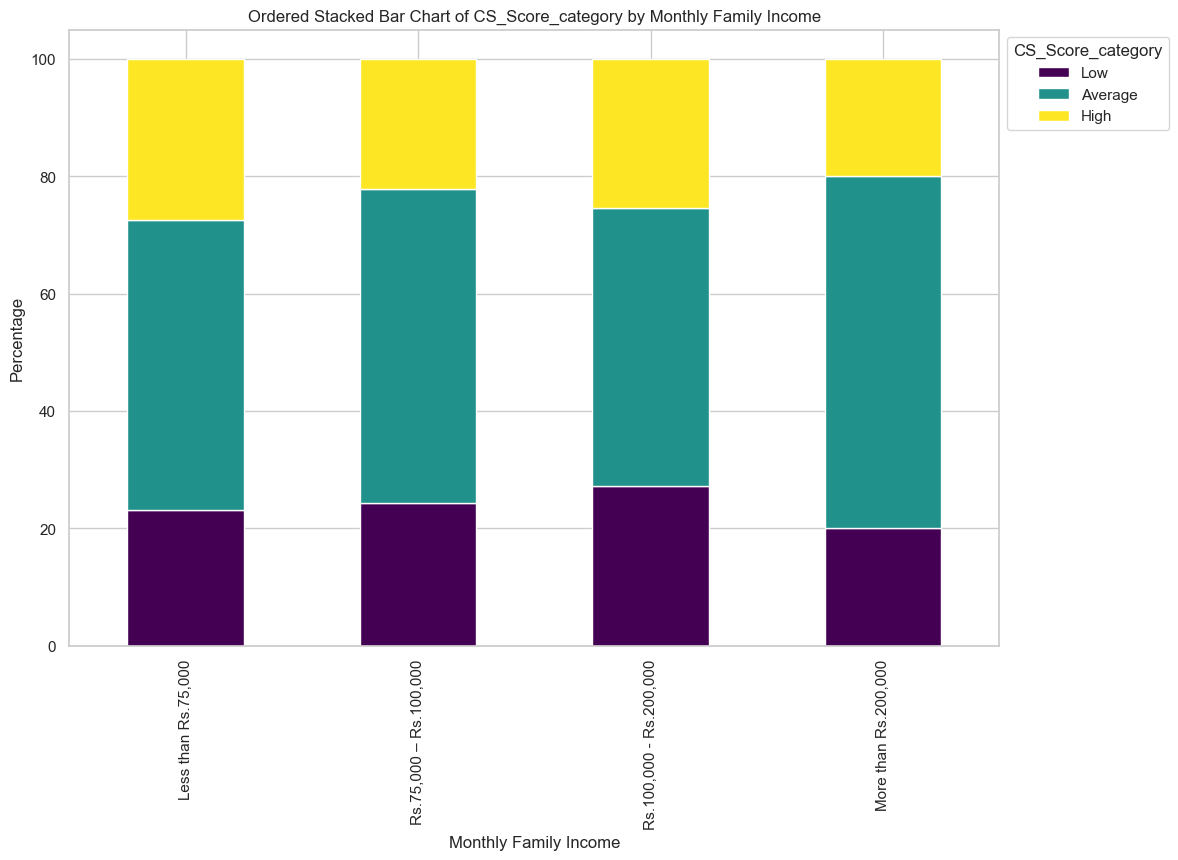

<Figure size 1200x800 with 0 Axes>

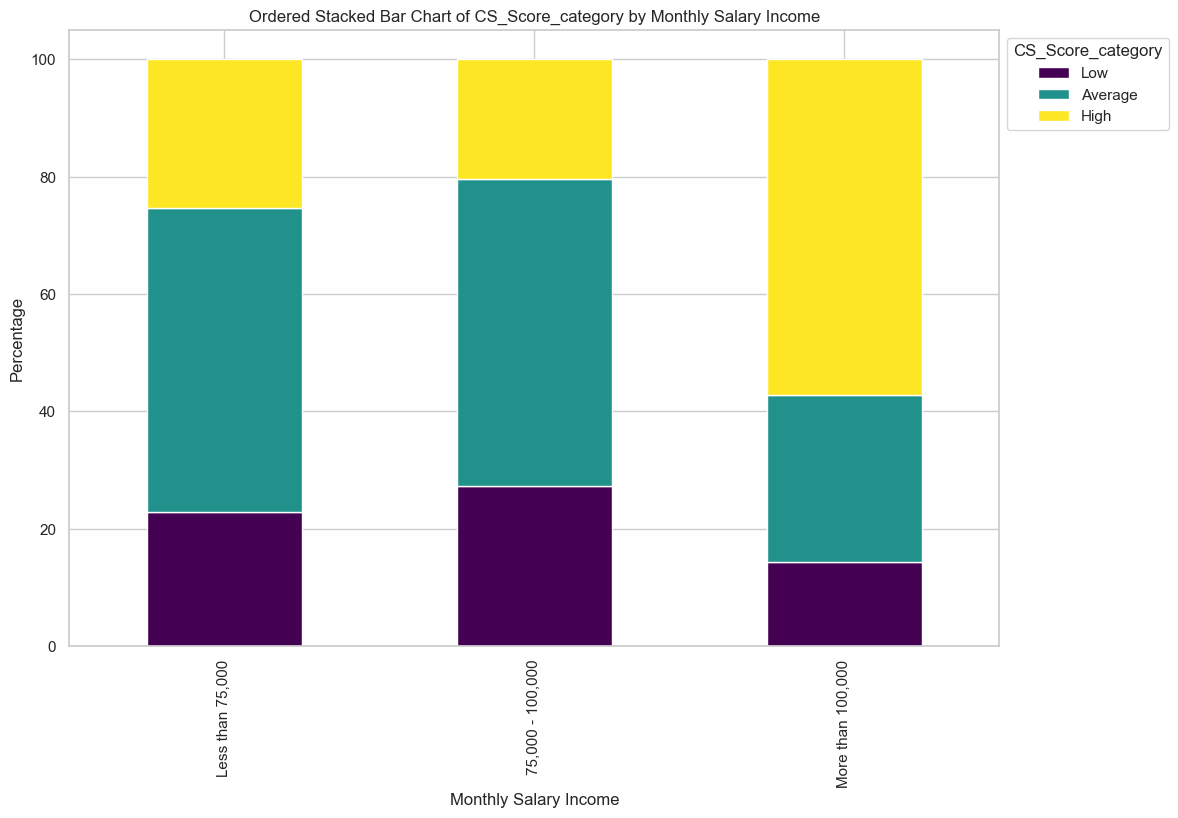

<Figure size 1200x800 with 0 Axes>

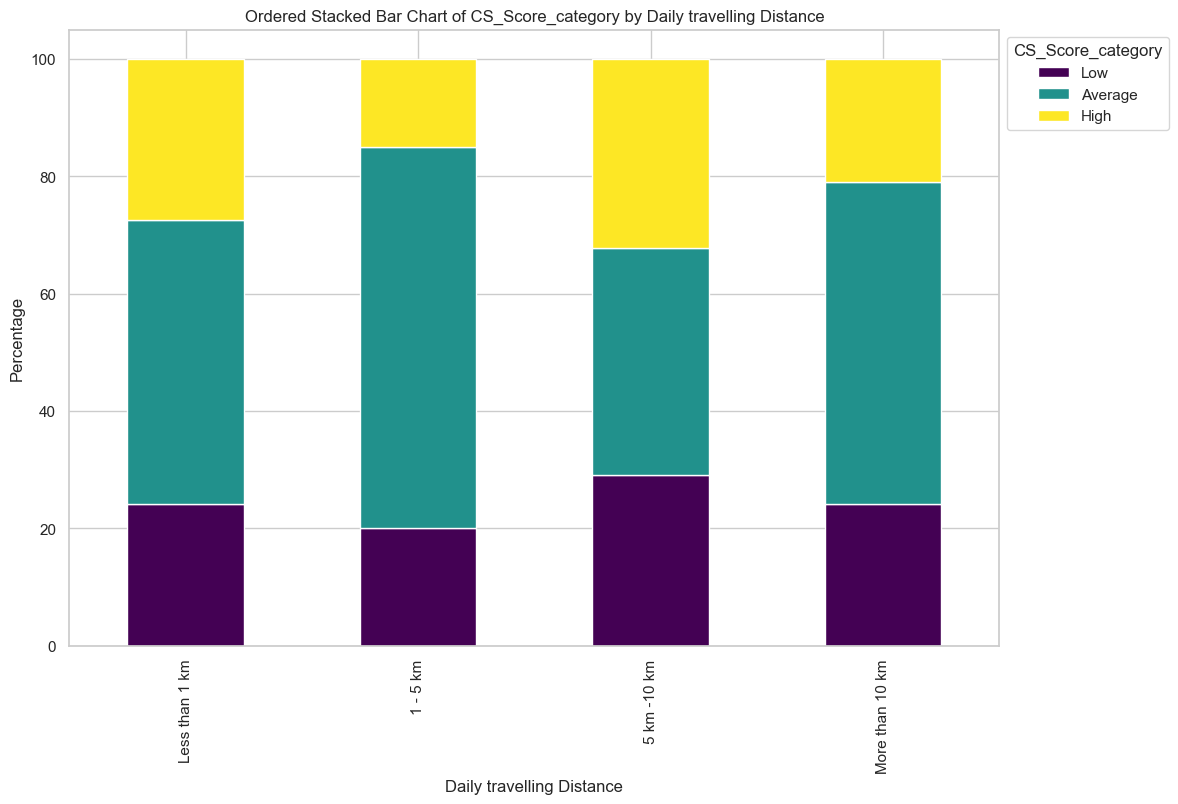

<Figure size 1200x800 with 0 Axes>

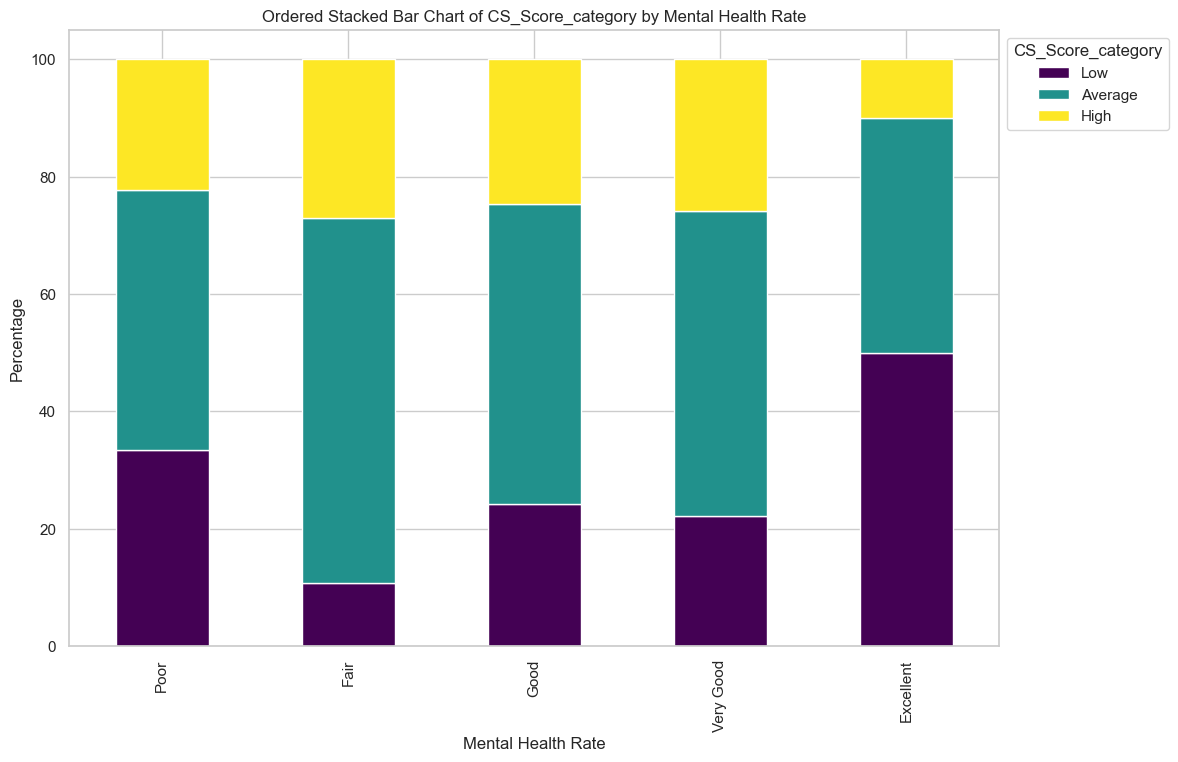

<Figure size 1200x800 with 0 Axes>

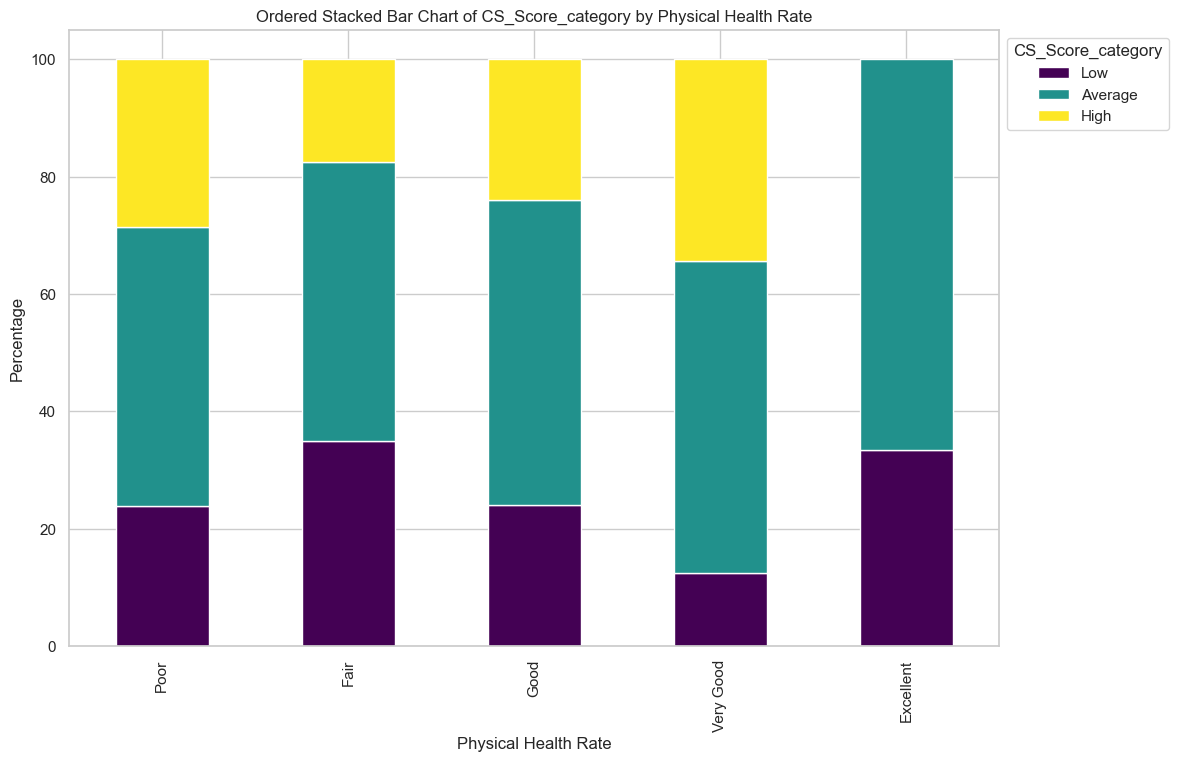

<Figure size 1200x800 with 0 Axes>

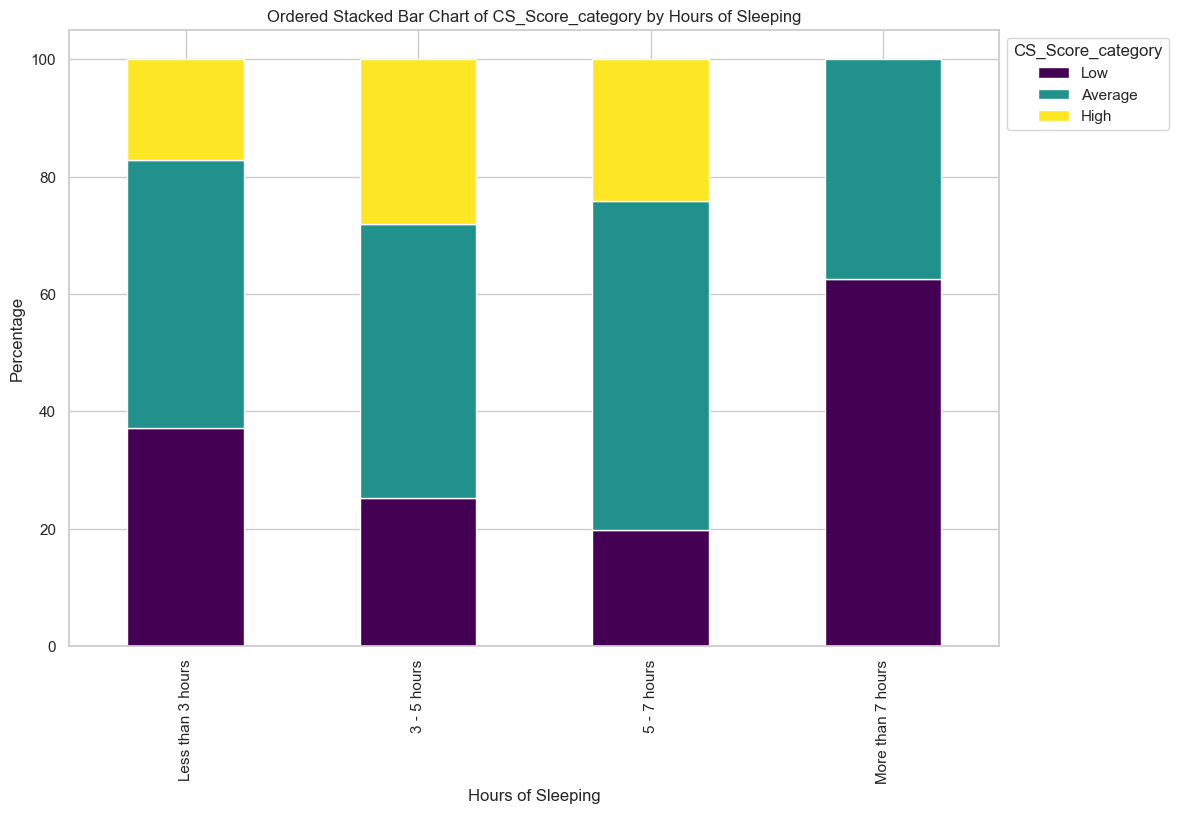

<Figure size 1200x800 with 0 Axes>

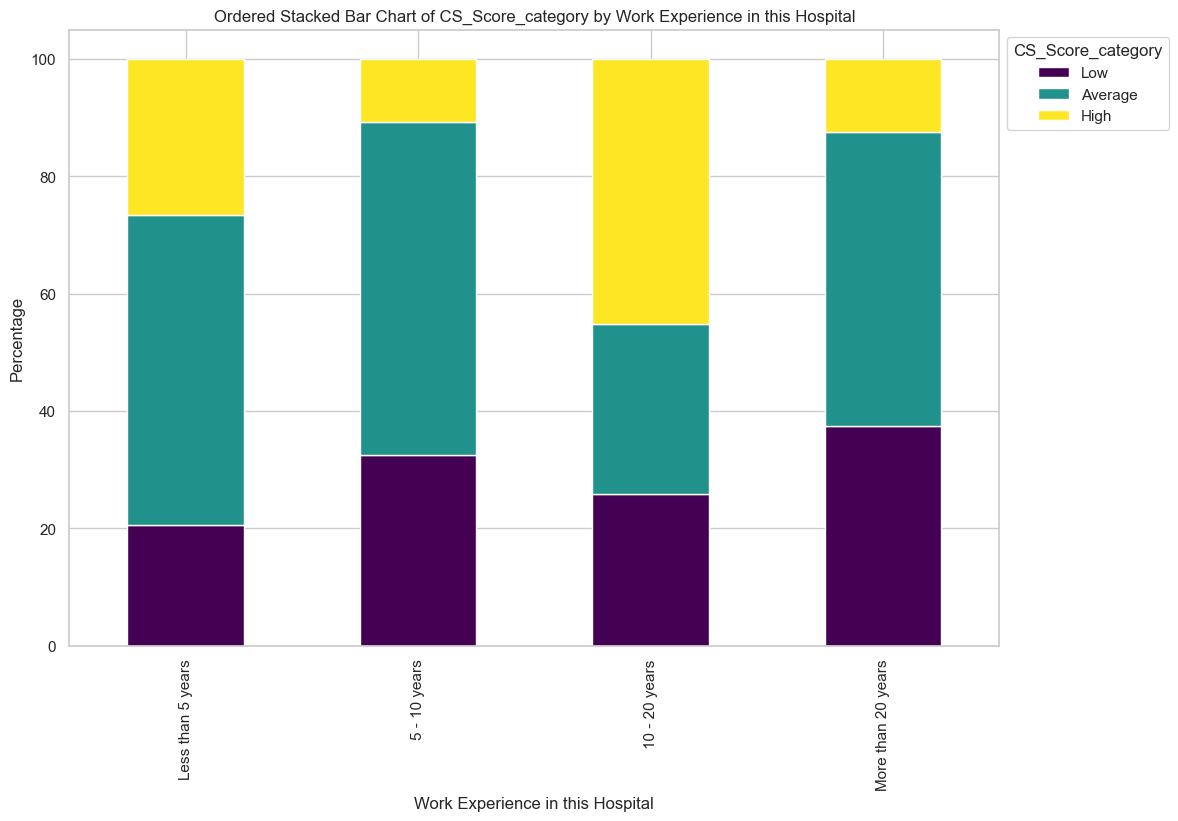

<Figure size 1200x800 with 0 Axes>

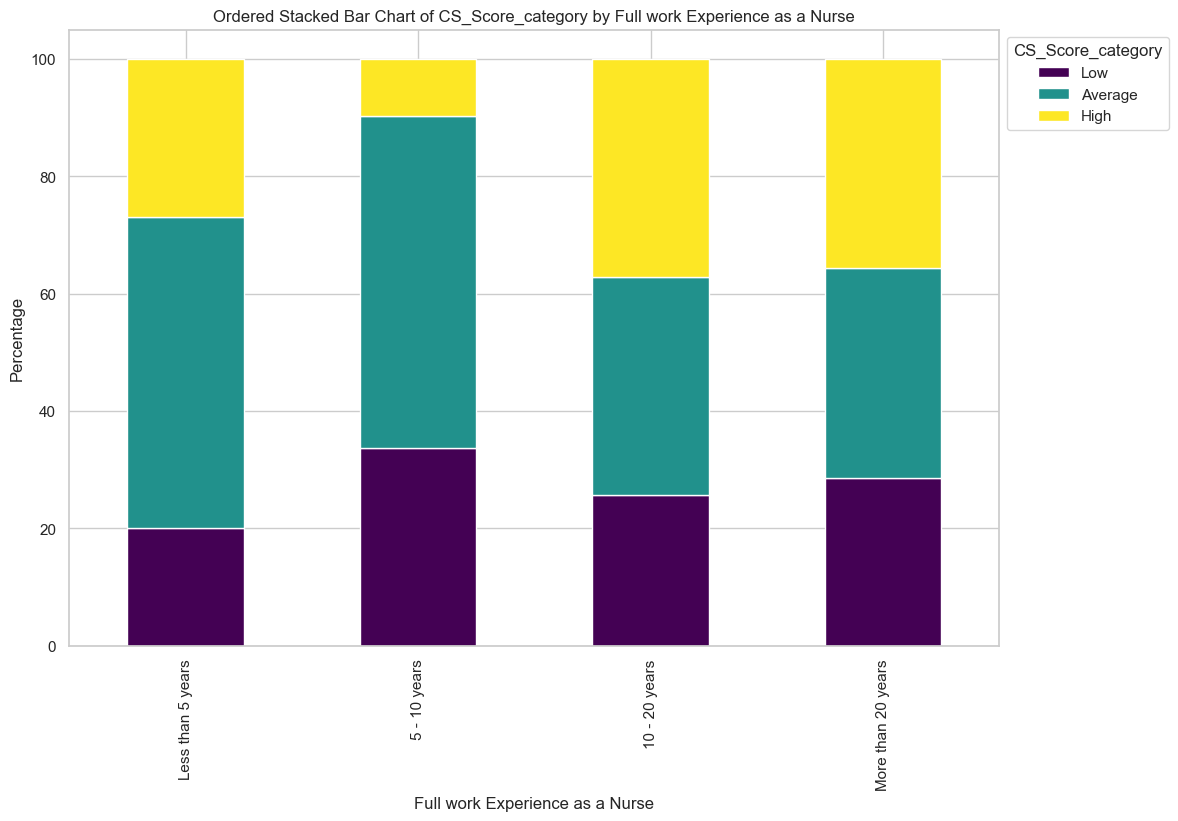

<Figure size 1200x800 with 0 Axes>

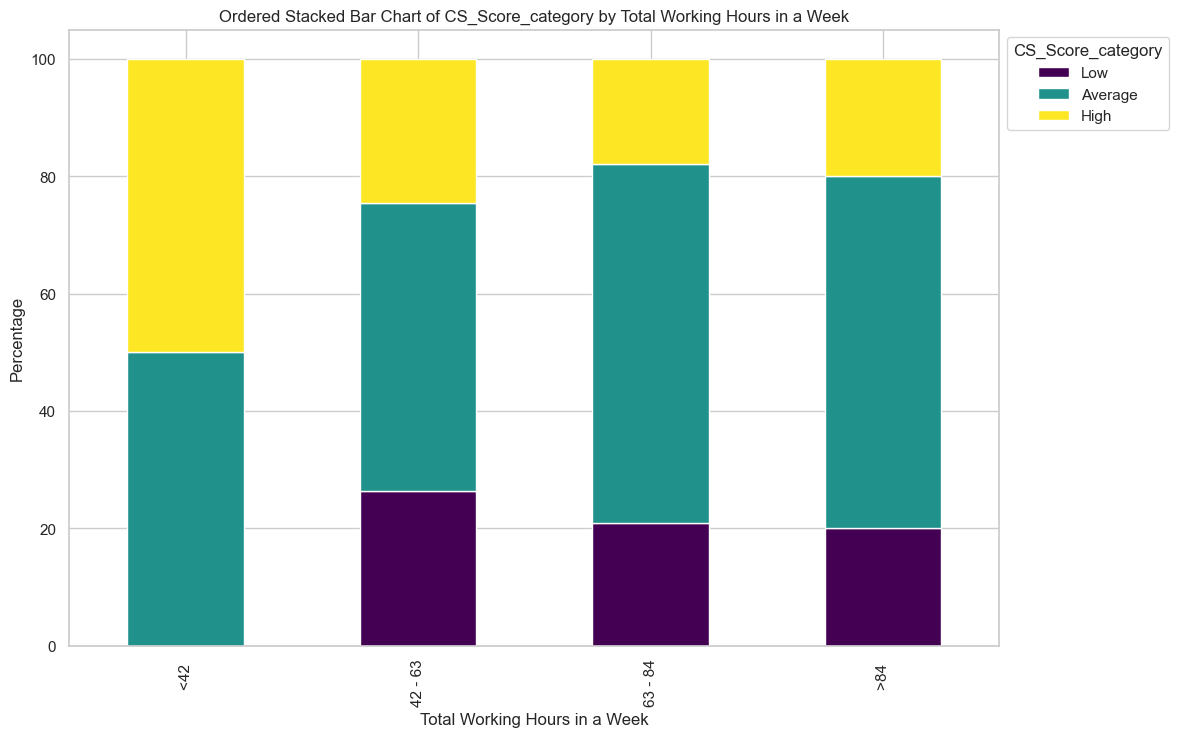

<Figure size 1200x800 with 0 Axes>

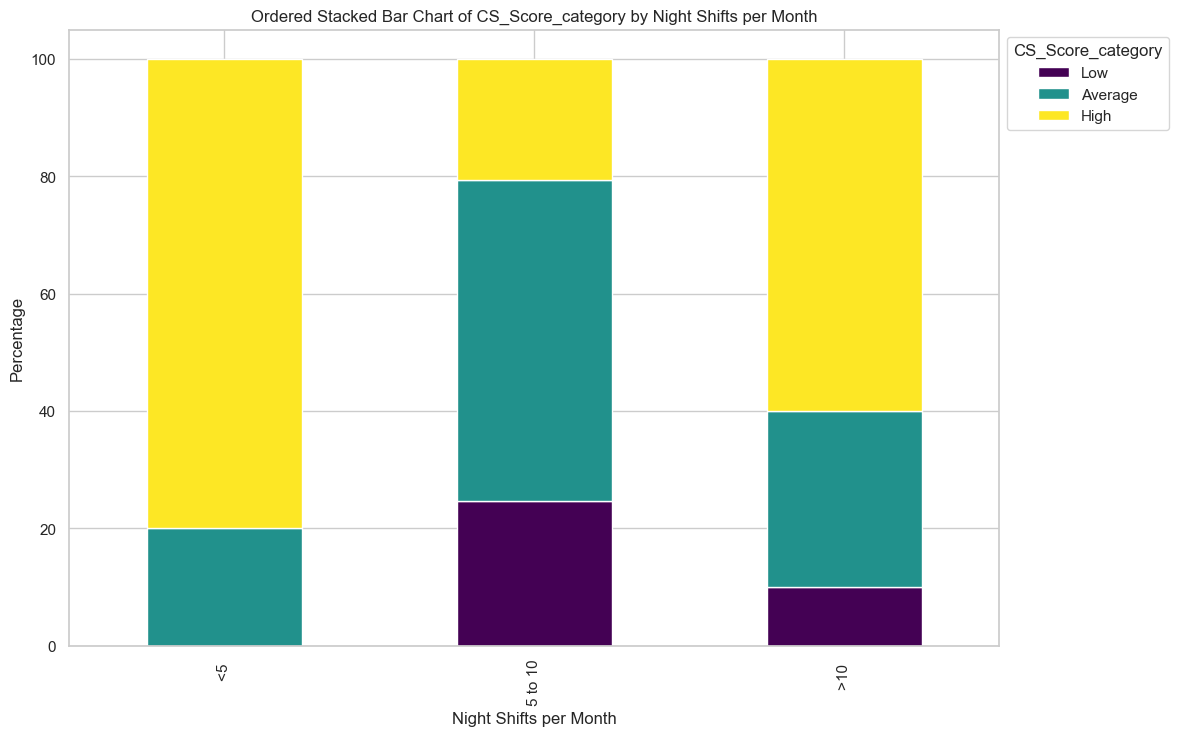

<Figure size 1200x800 with 0 Axes>

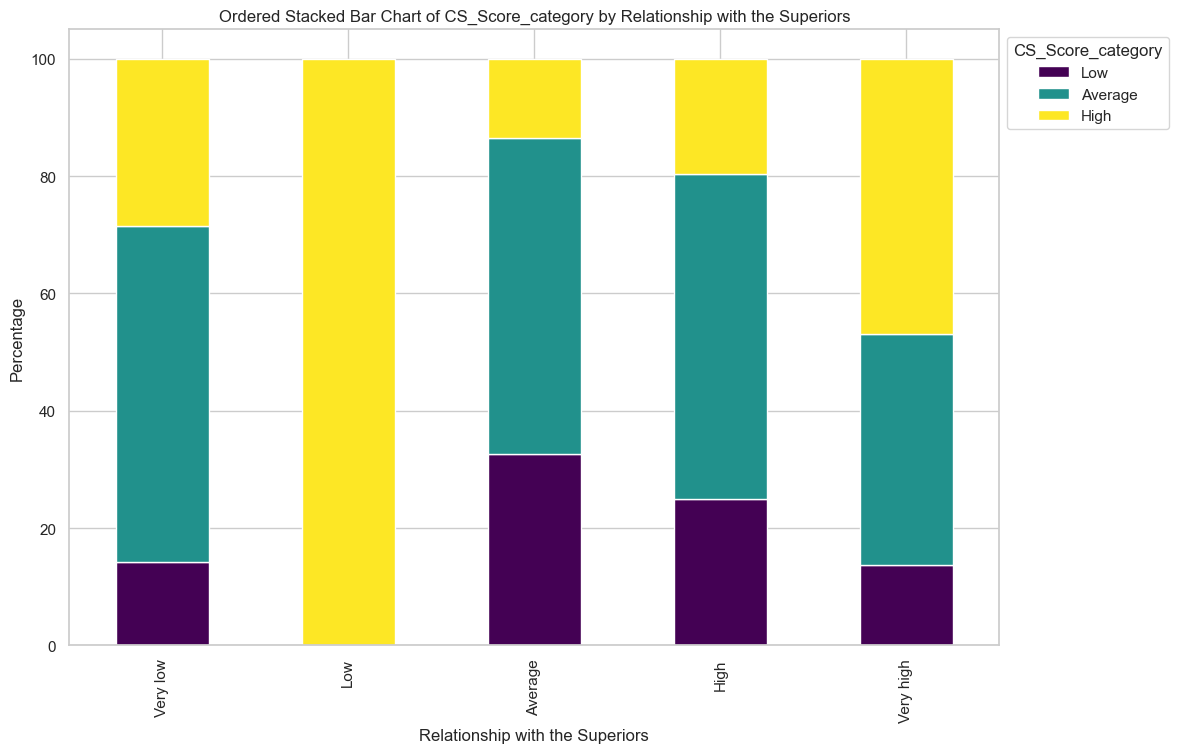

<Figure size 1200x800 with 0 Axes>

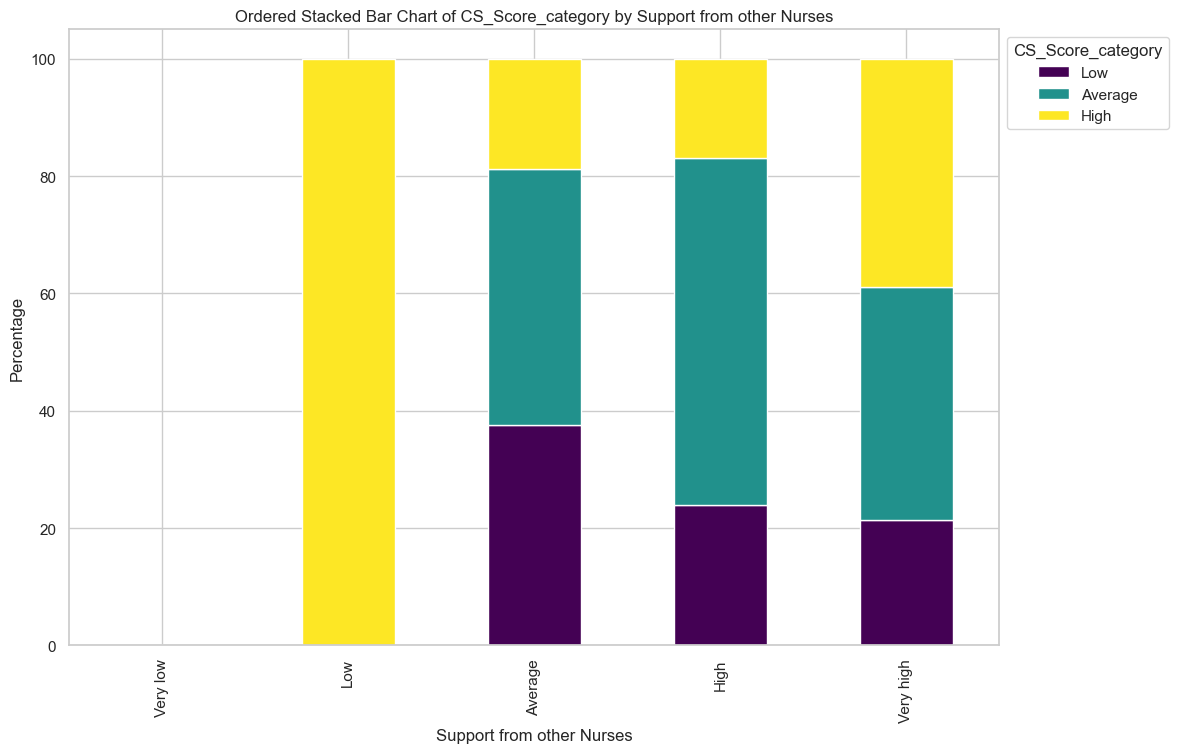

<Figure size 1200x800 with 0 Axes>

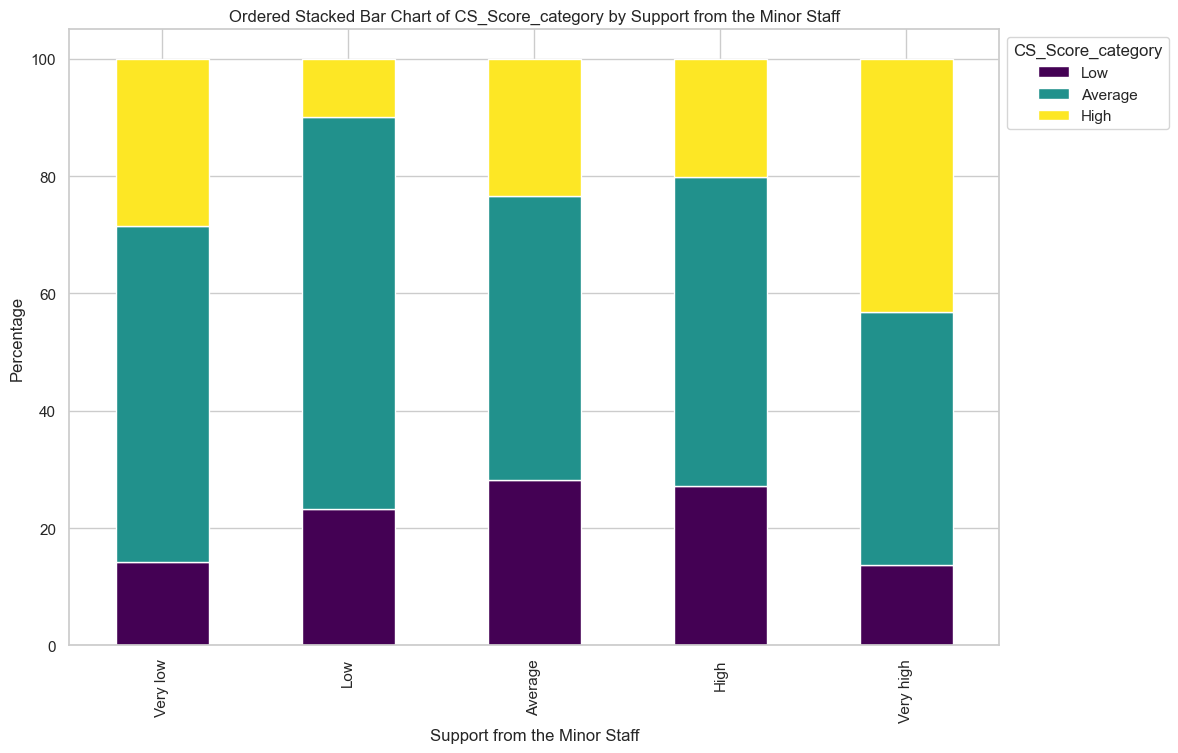

<Figure size 1200x800 with 0 Axes>

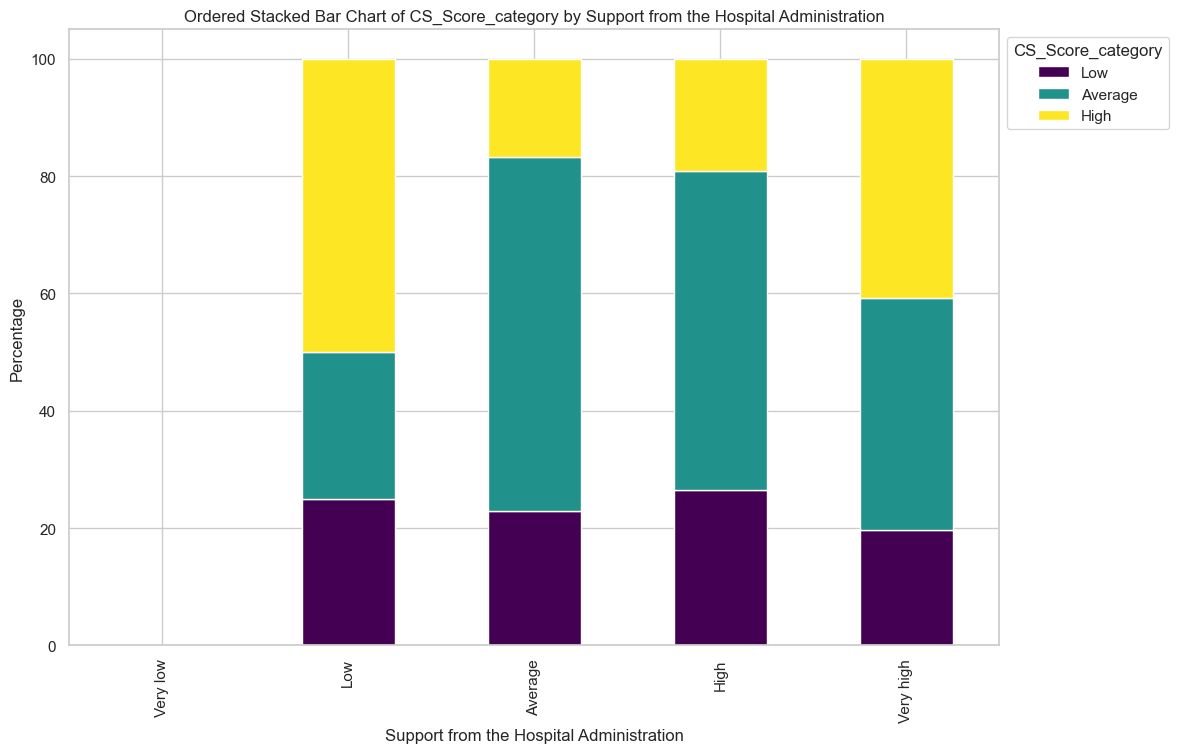

<Figure size 1200x800 with 0 Axes>

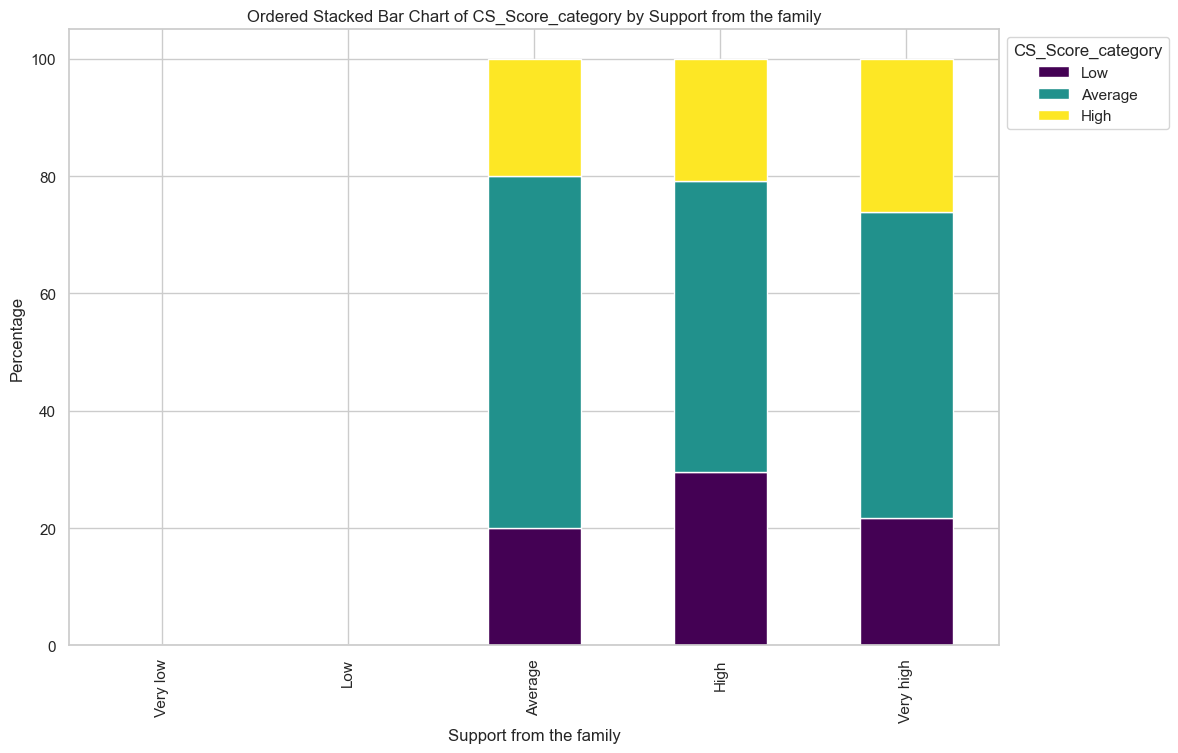

<Figure size 1200x800 with 0 Axes>

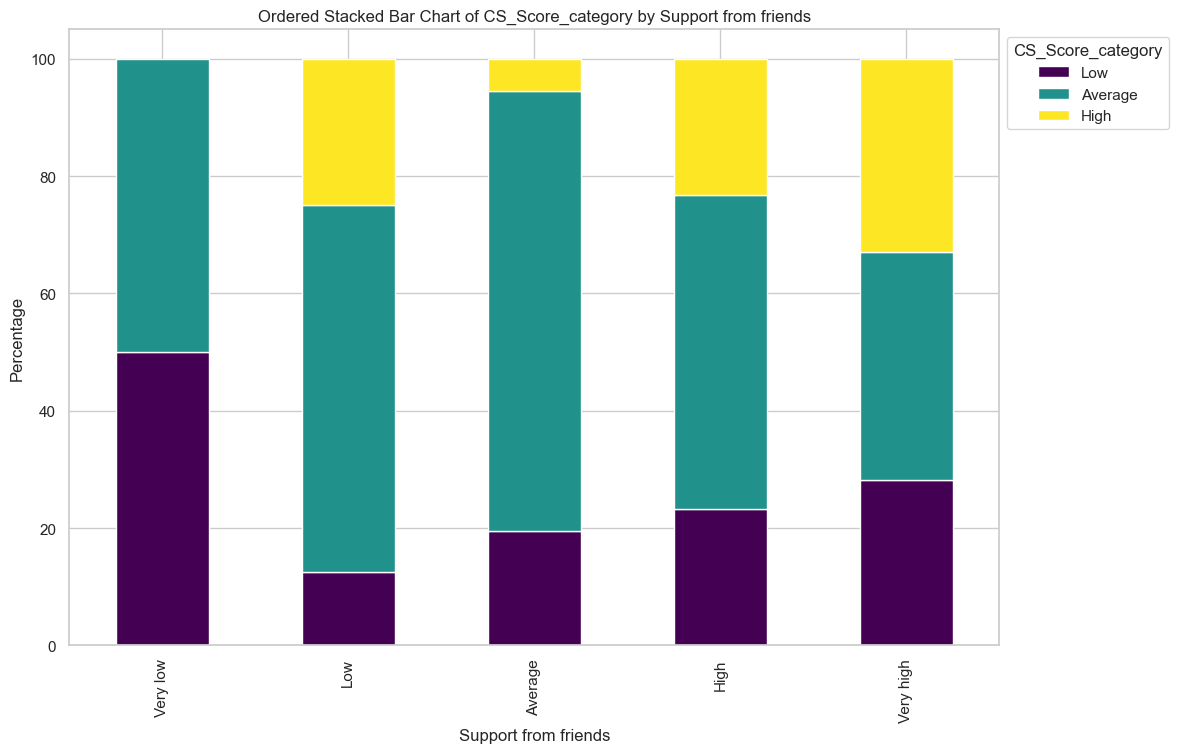

<Figure size 1200x800 with 0 Axes>

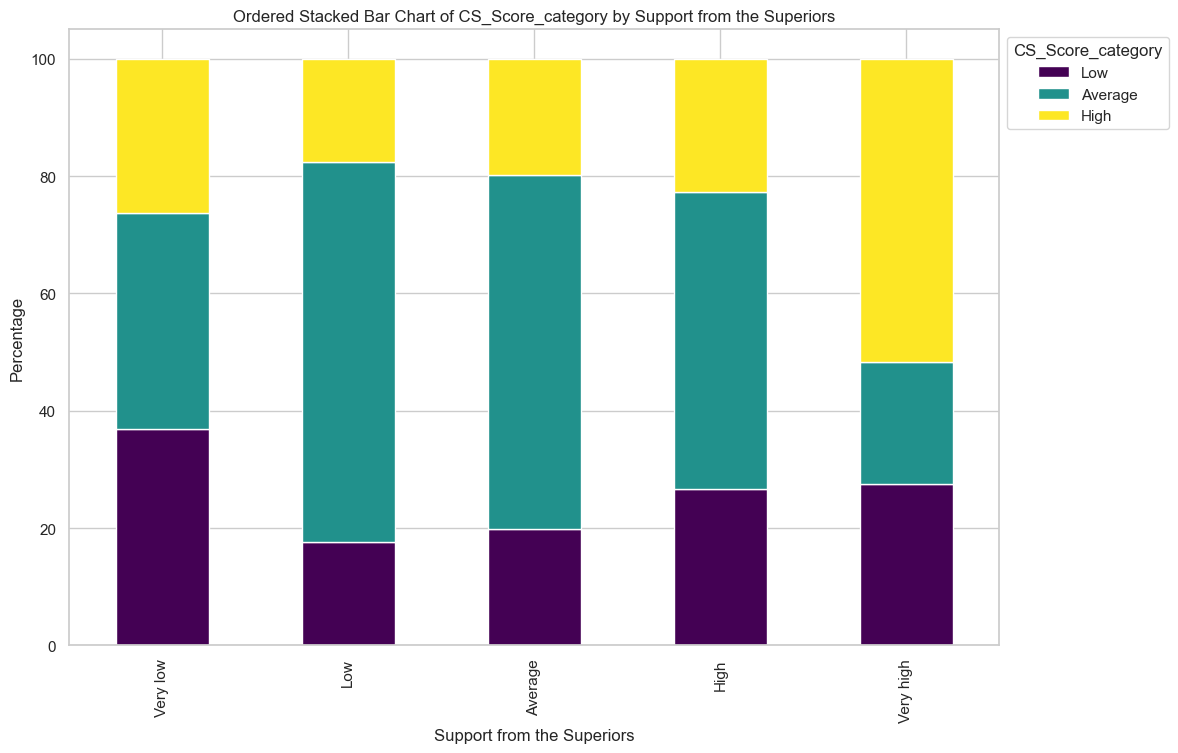

<Figure size 1200x800 with 0 Axes>

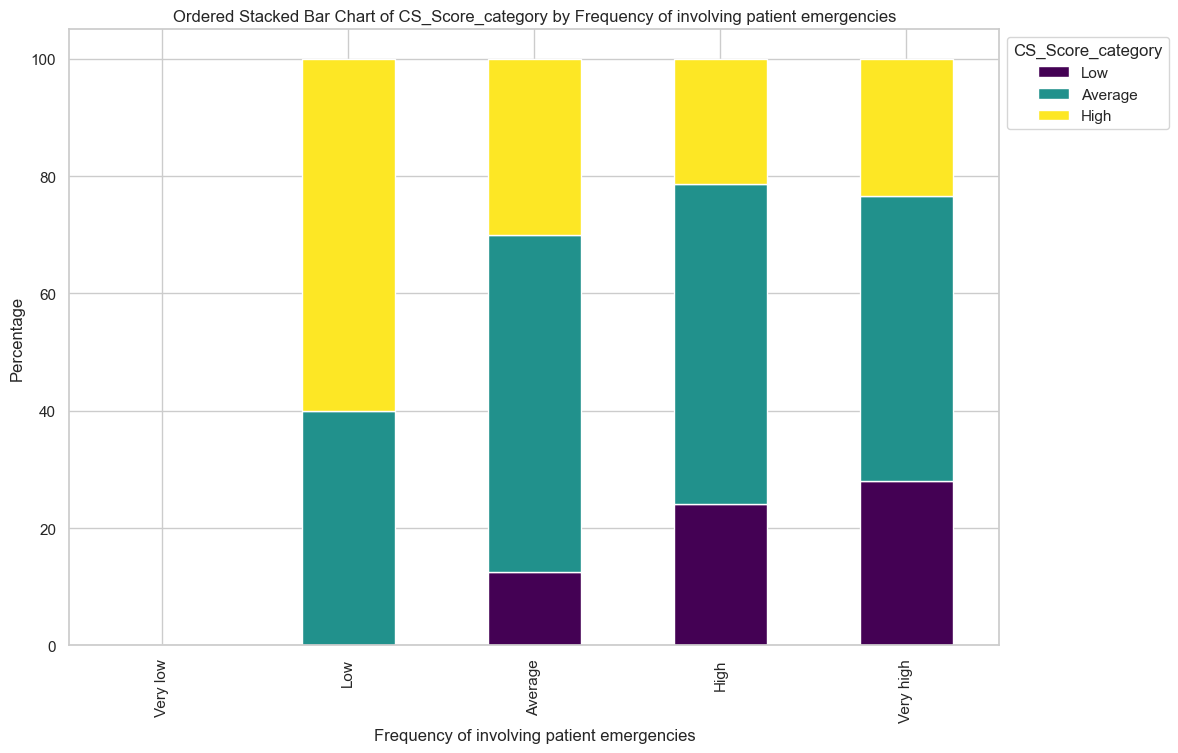

<Figure size 1200x800 with 0 Axes>

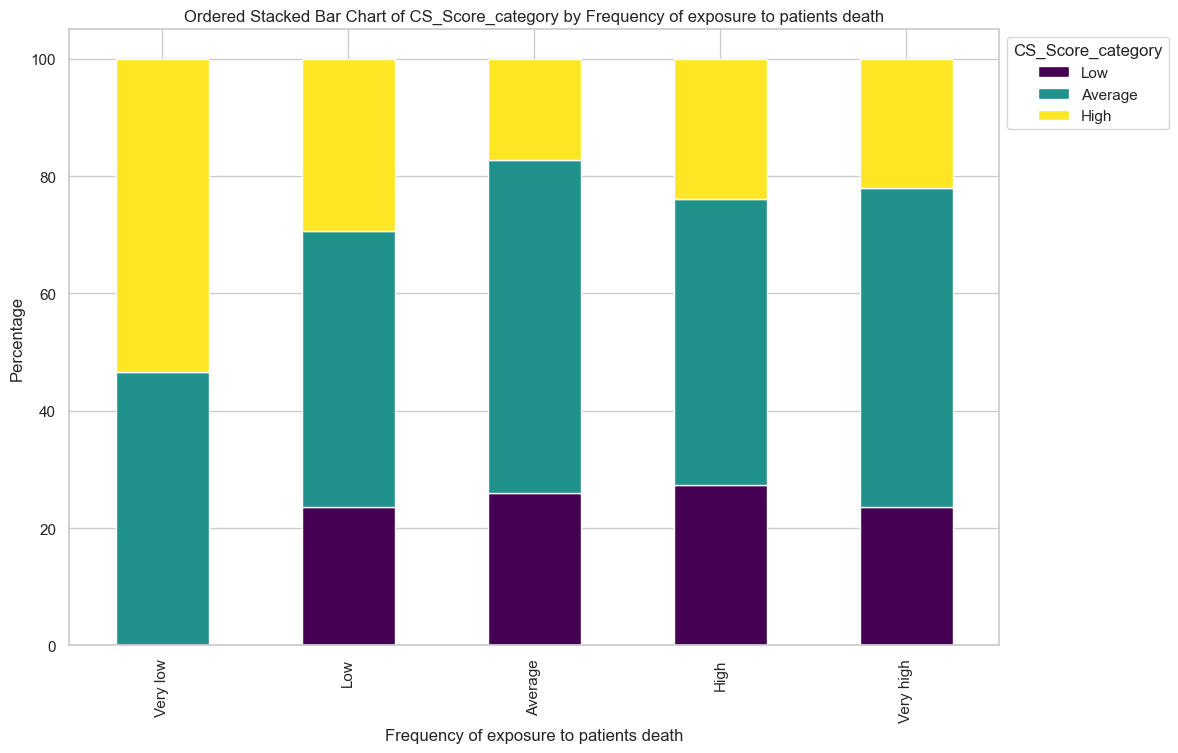

<Figure size 1200x800 with 0 Axes>

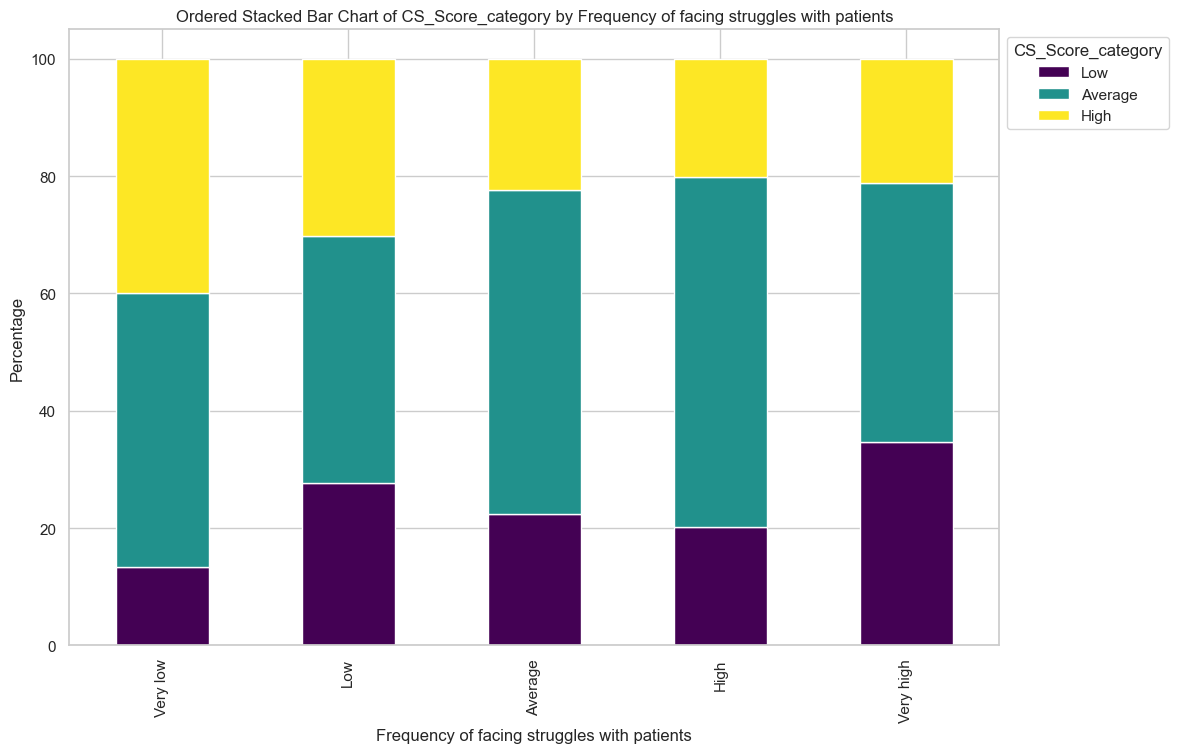

<Figure size 1200x800 with 0 Axes>

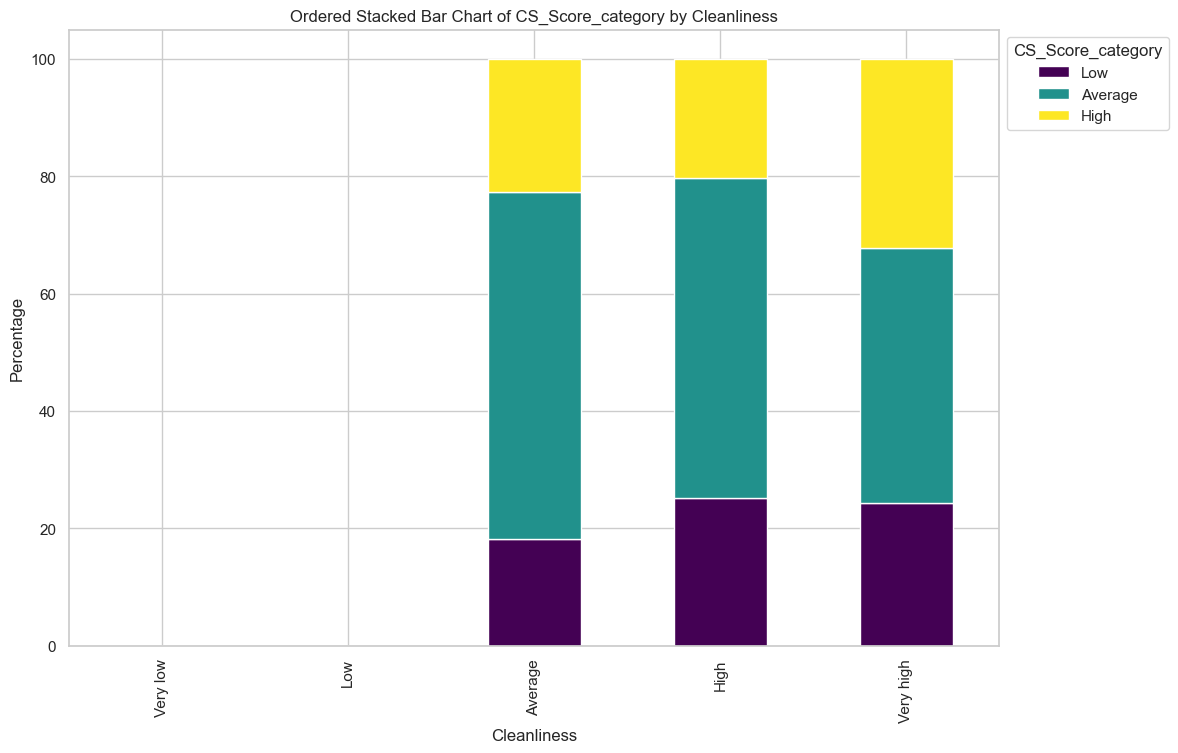

<Figure size 1200x800 with 0 Axes>

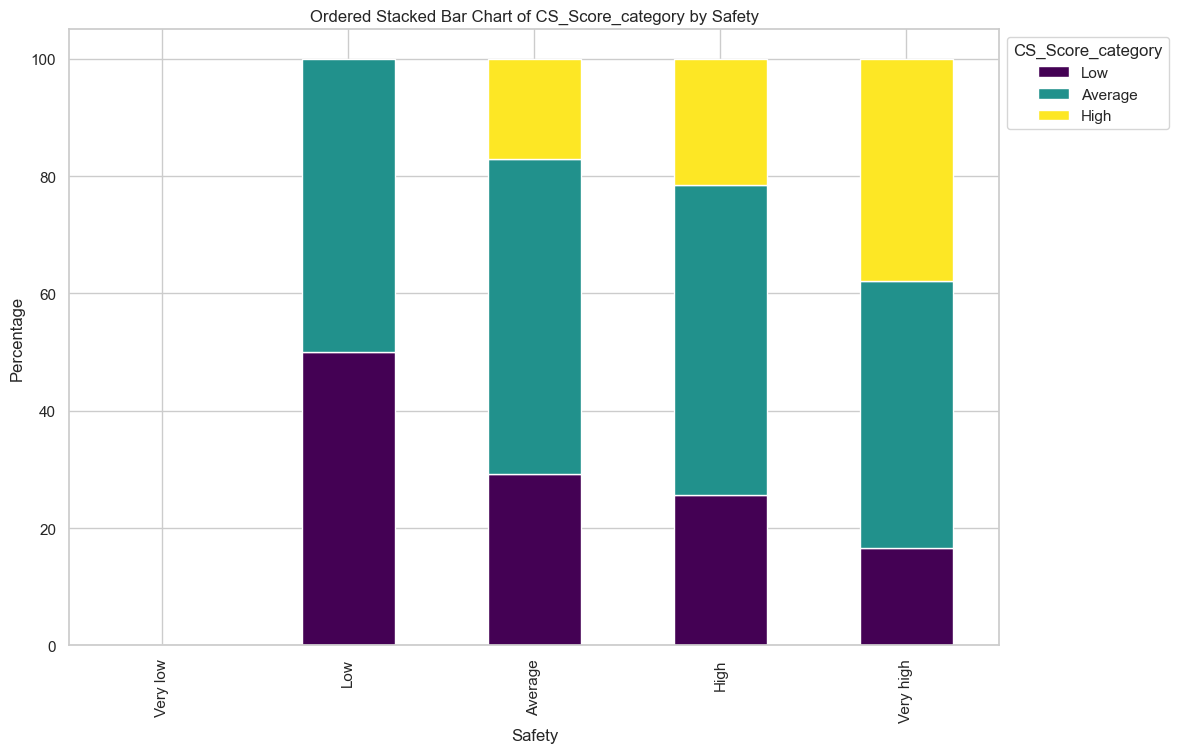

<Figure size 1200x800 with 0 Axes>

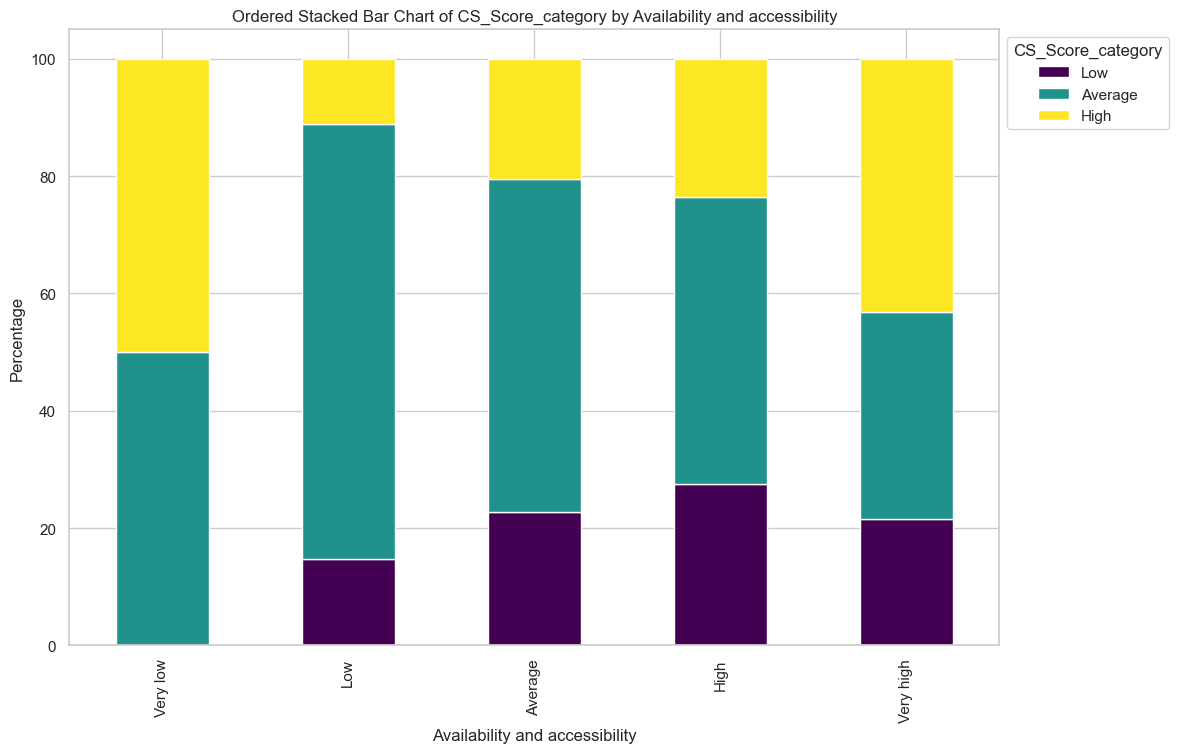

<Figure size 1200x800 with 0 Axes>

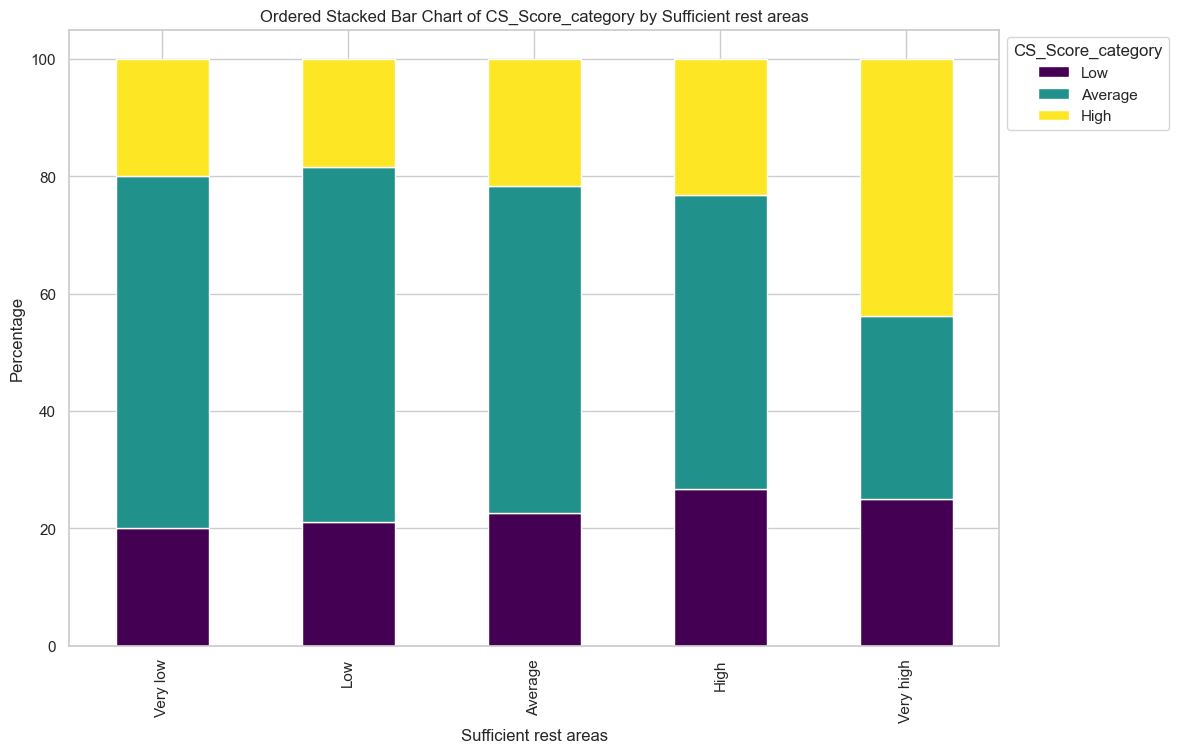

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.set(style="whitegrid")

# Define the order of levels
order = ['Low', 'Average', 'High']

# Loop through each ordinal predictor variable
for ordinal_variable in ordinal_variables:
    plt.figure(figsize=(12, 8))

    # Create a pivot table
    pivot_table = df.groupby([ordinal_variable, 'CS_Score_category']).size().unstack().reindex(ordinal_variables_order[ordinal_variable])

    # Order the columns based on the specified order
    pivot_table = pivot_table[order]

    # Calculate percentages
    pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

    # Plot the ordered stacked bar chart
    pivot_table_percentage.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
    plt.title(f"Ordered Stacked Bar Chart of CS_Score_category by {ordinal_variable}")
    plt.xlabel(ordinal_variable)
    plt.ylabel("Percentage")
    plt.legend(title='CS_Score_category', bbox_to_anchor=(1, 1))
    plt.show()

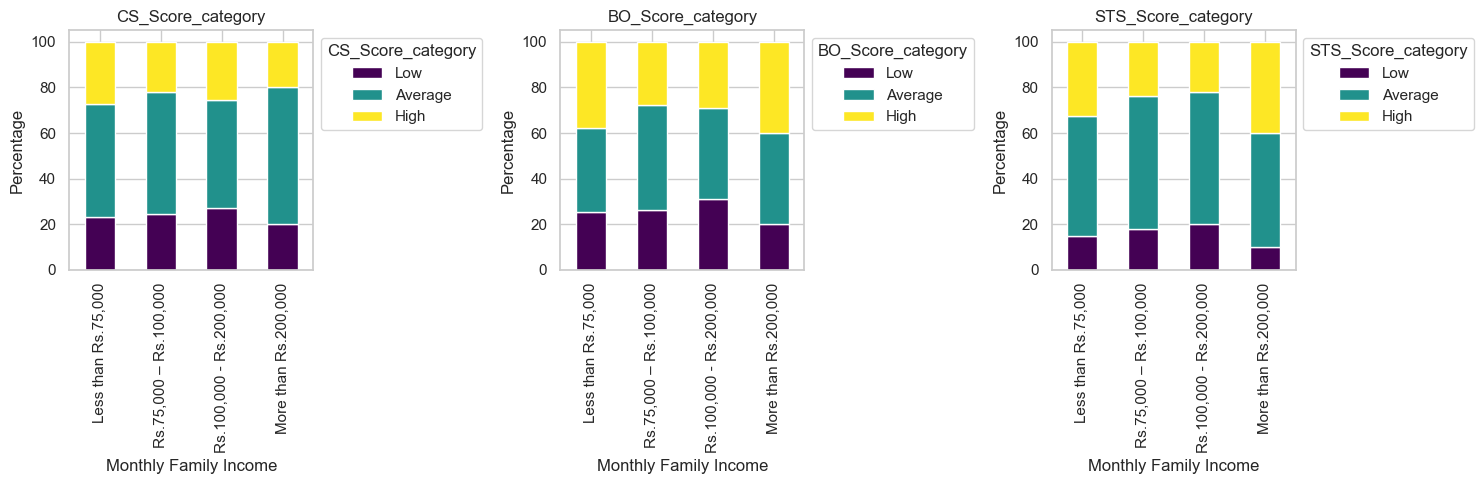

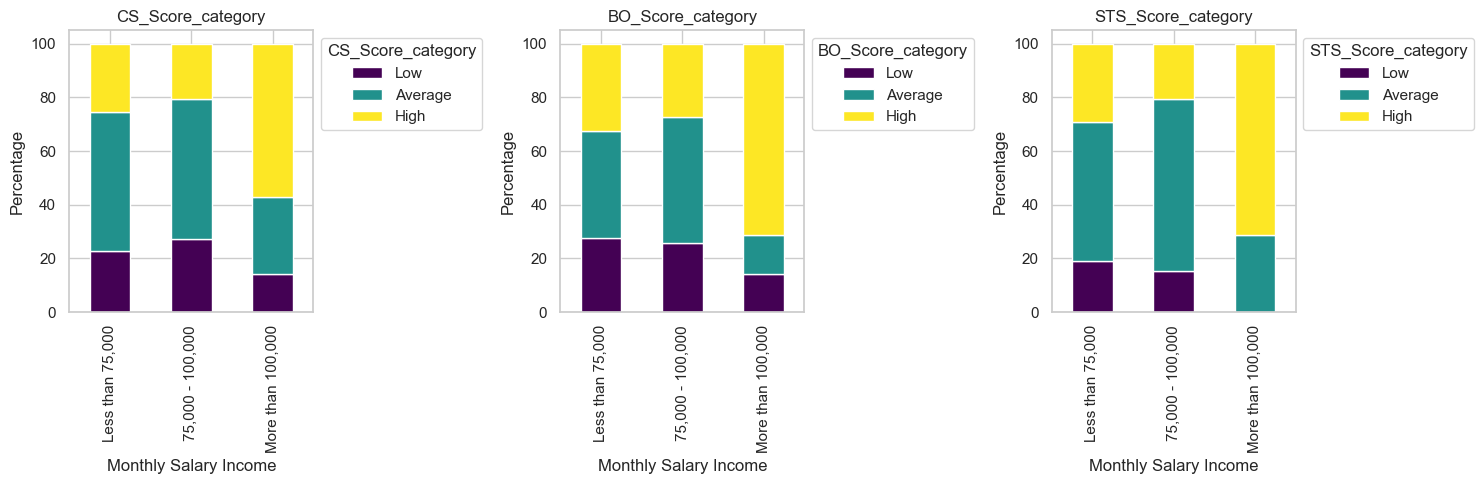

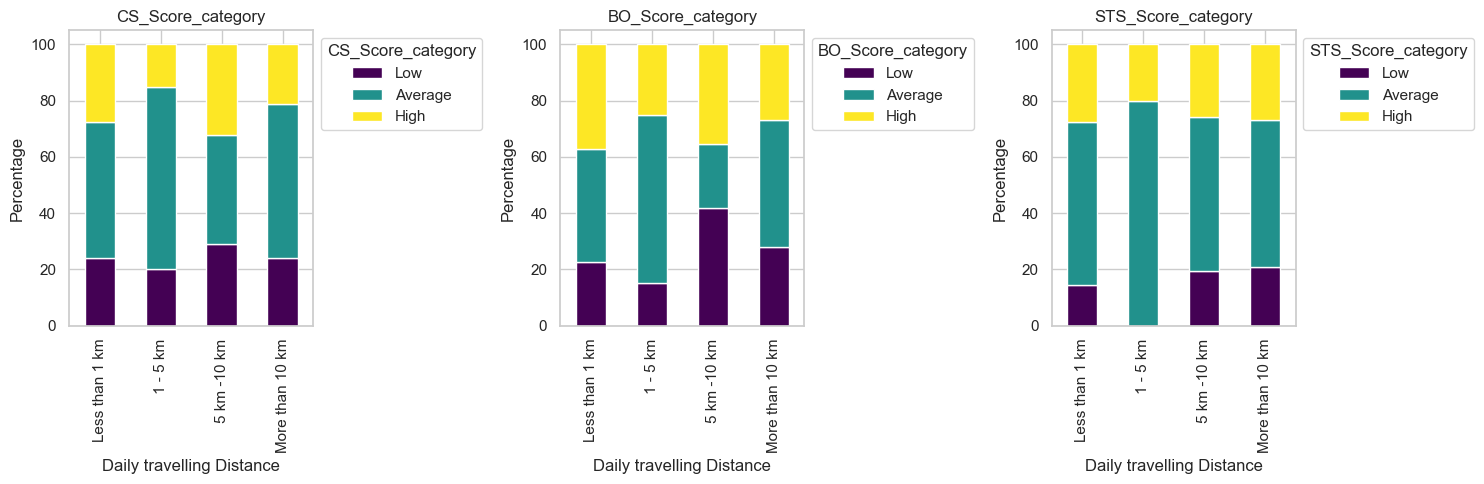

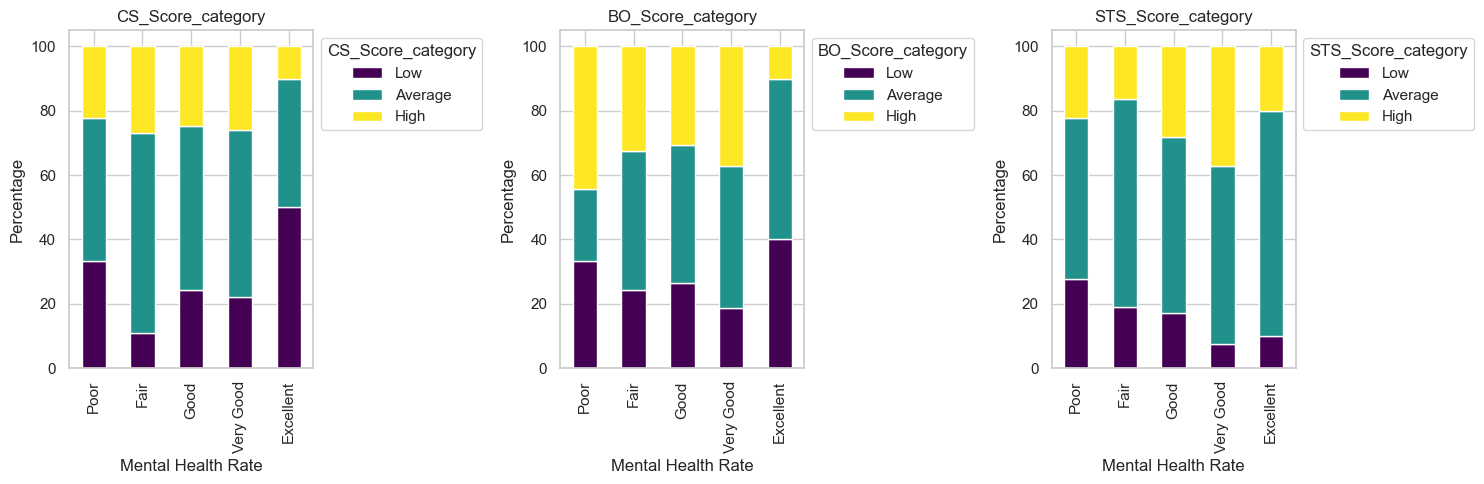

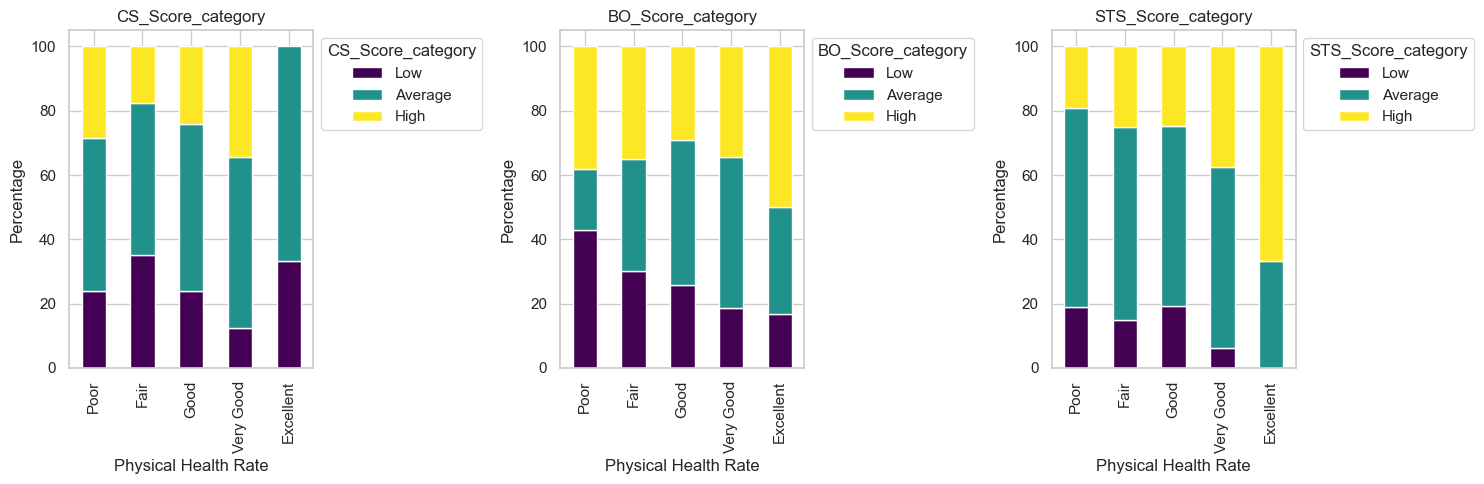

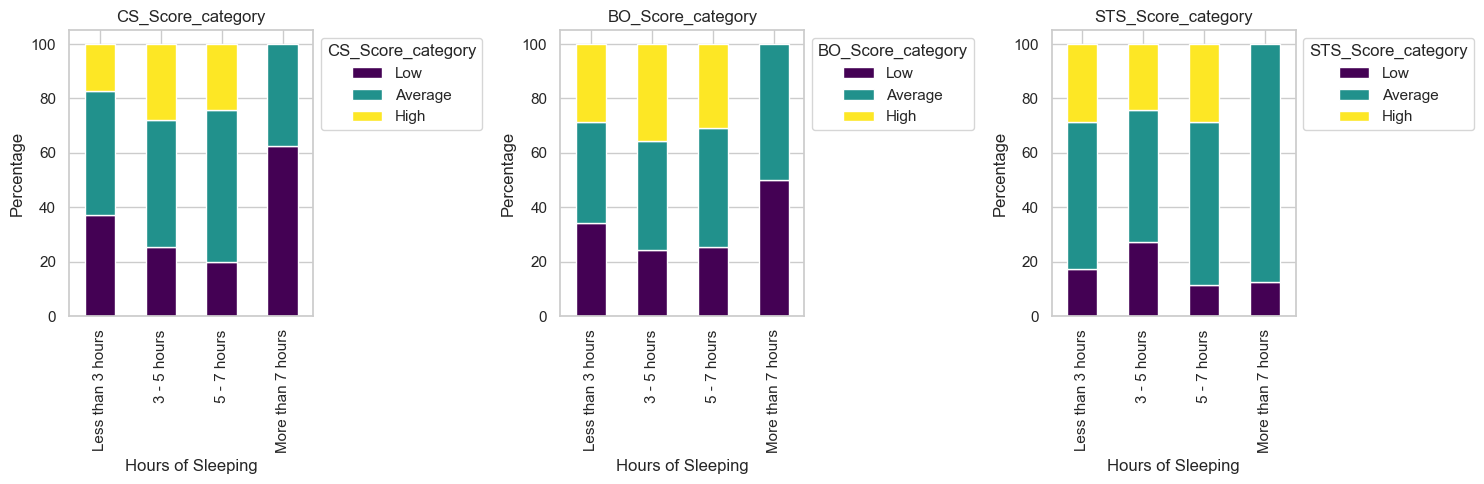

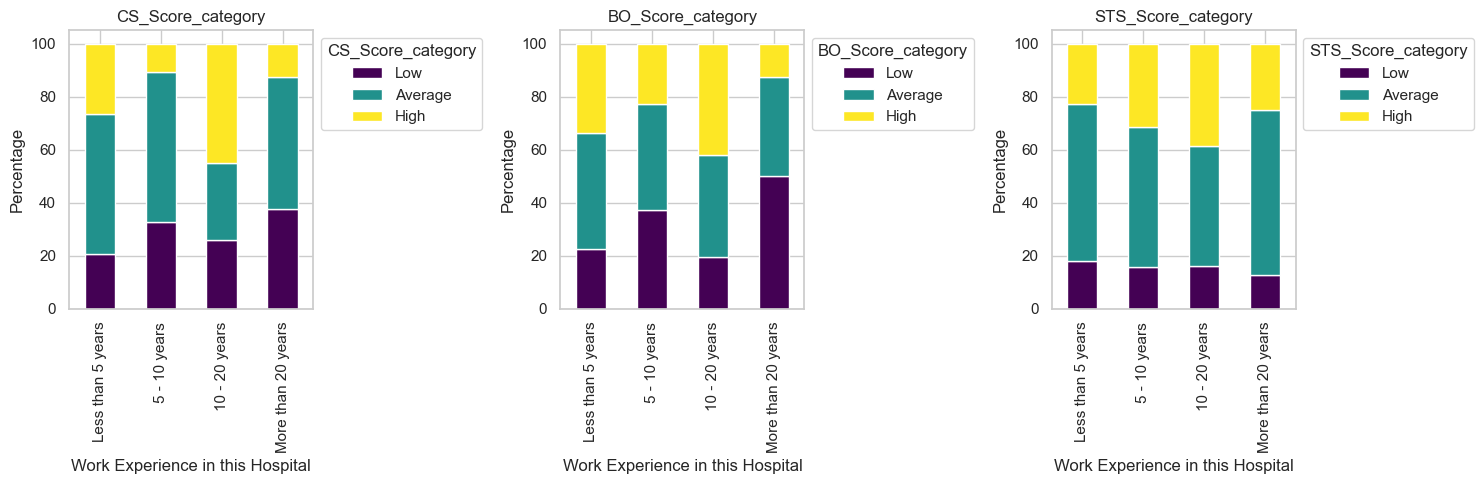

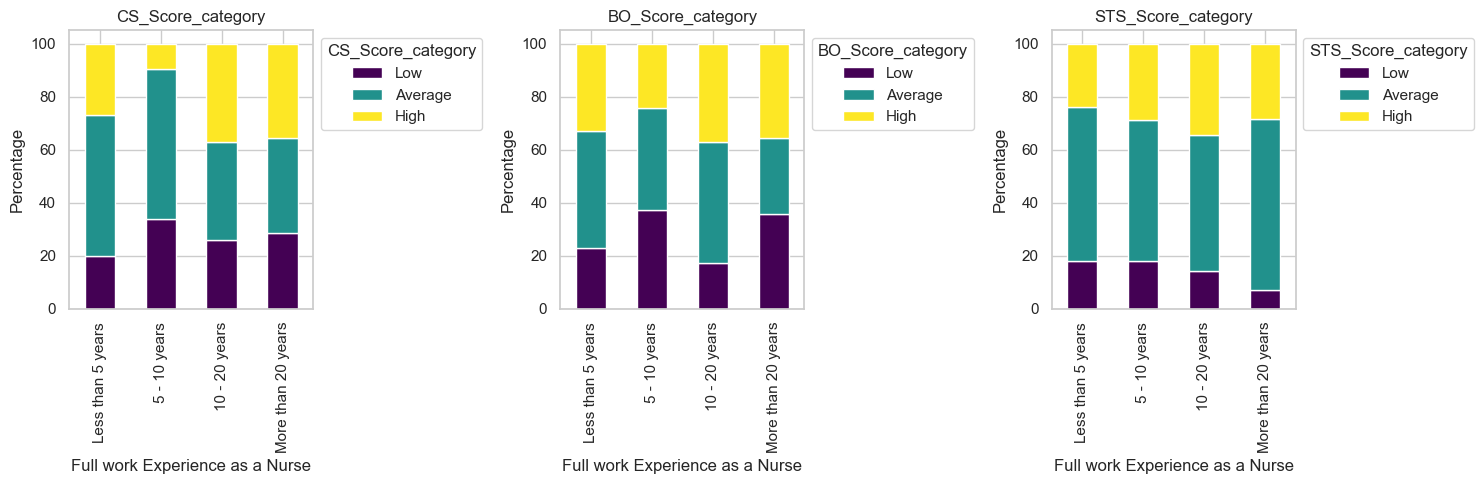

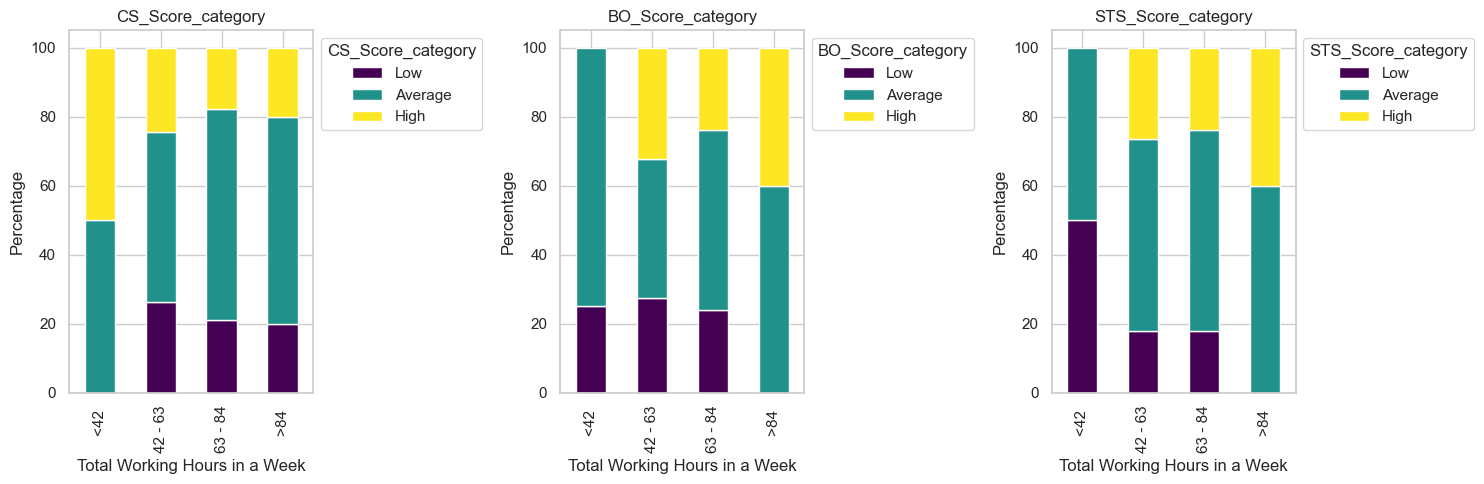

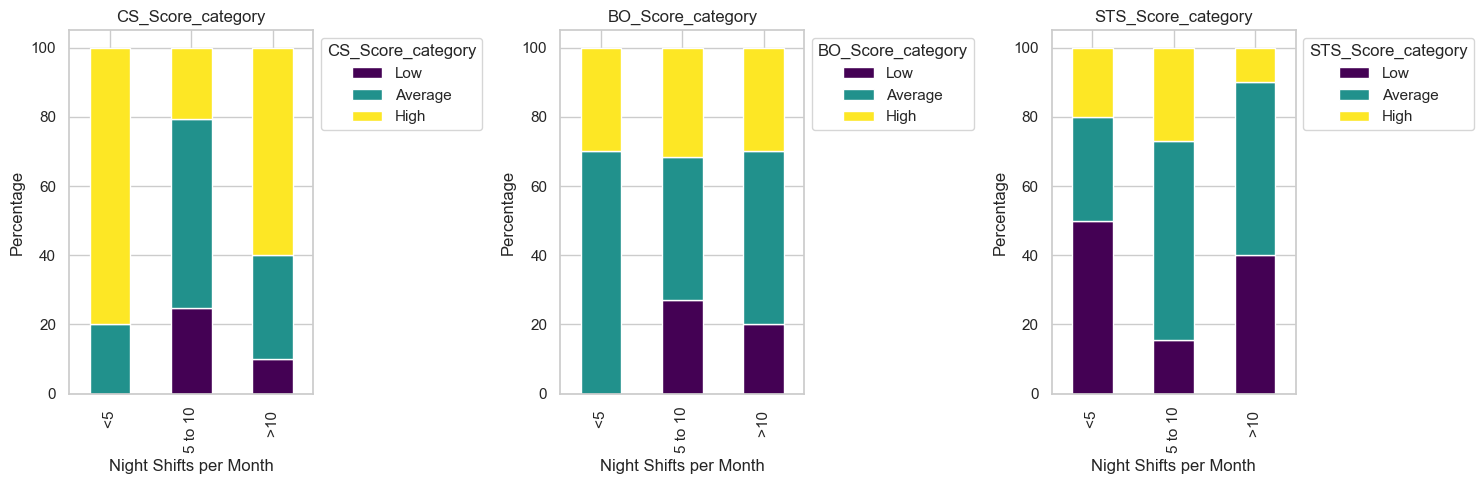

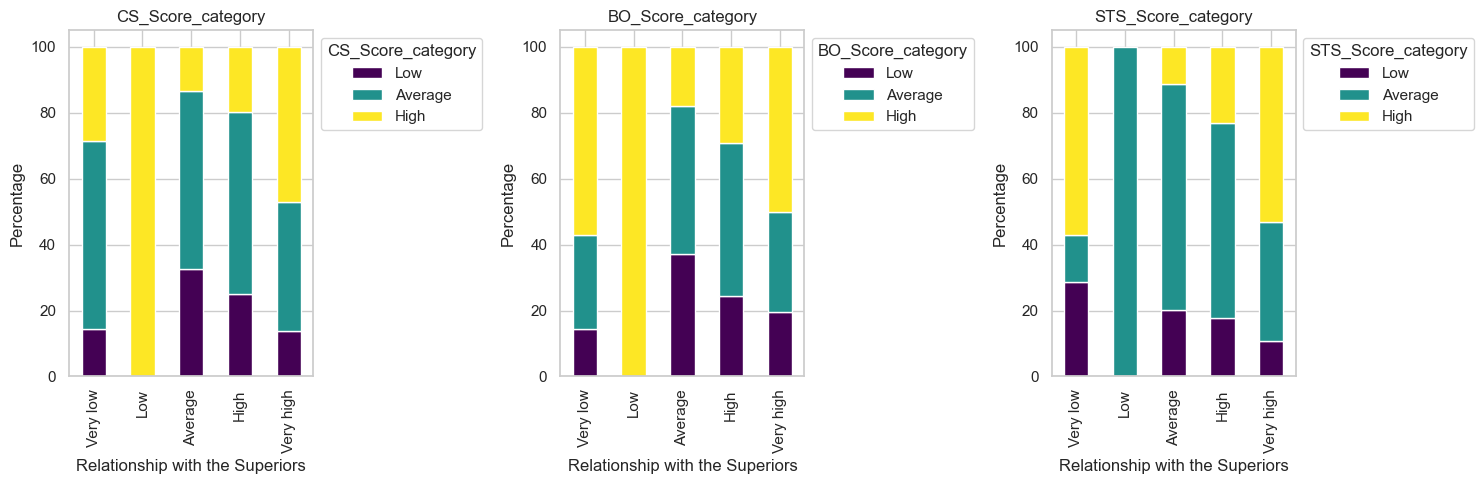

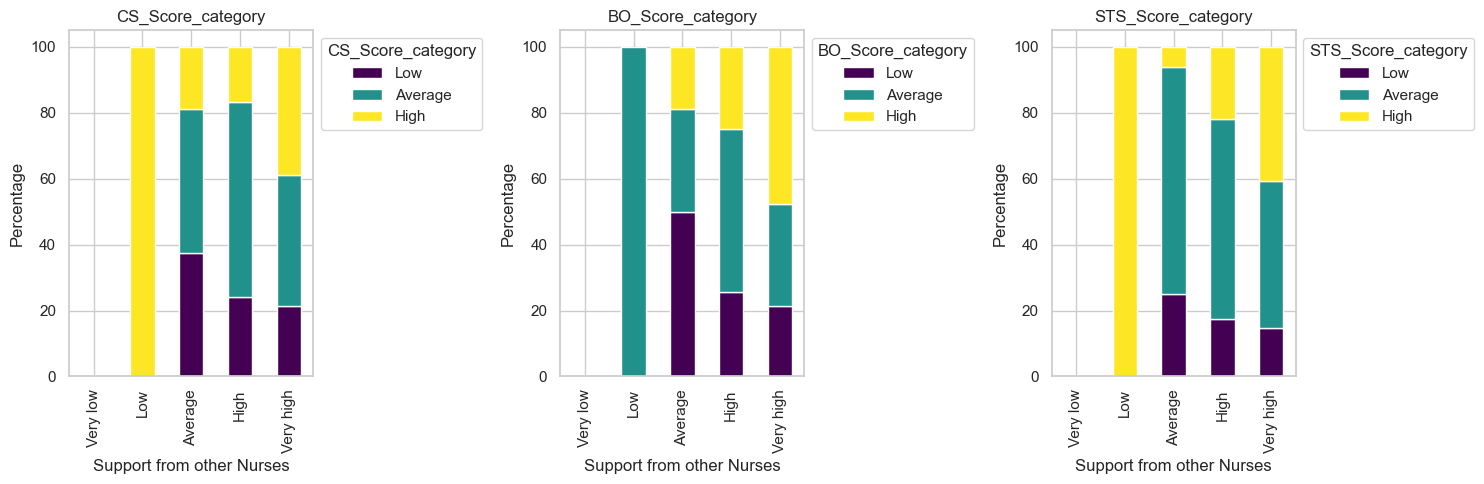

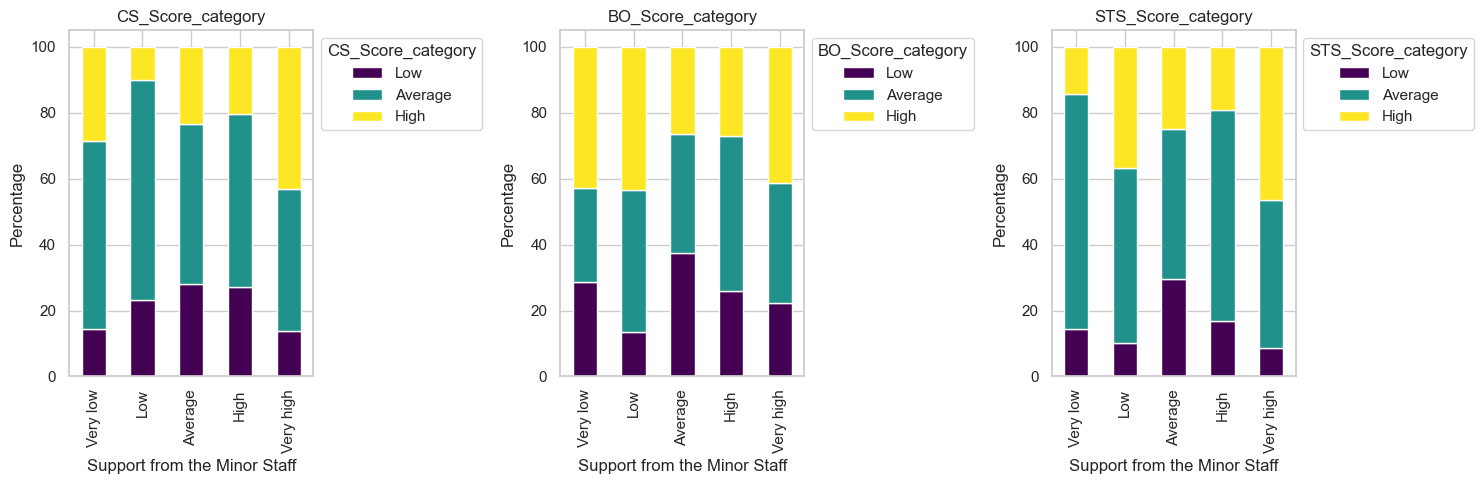

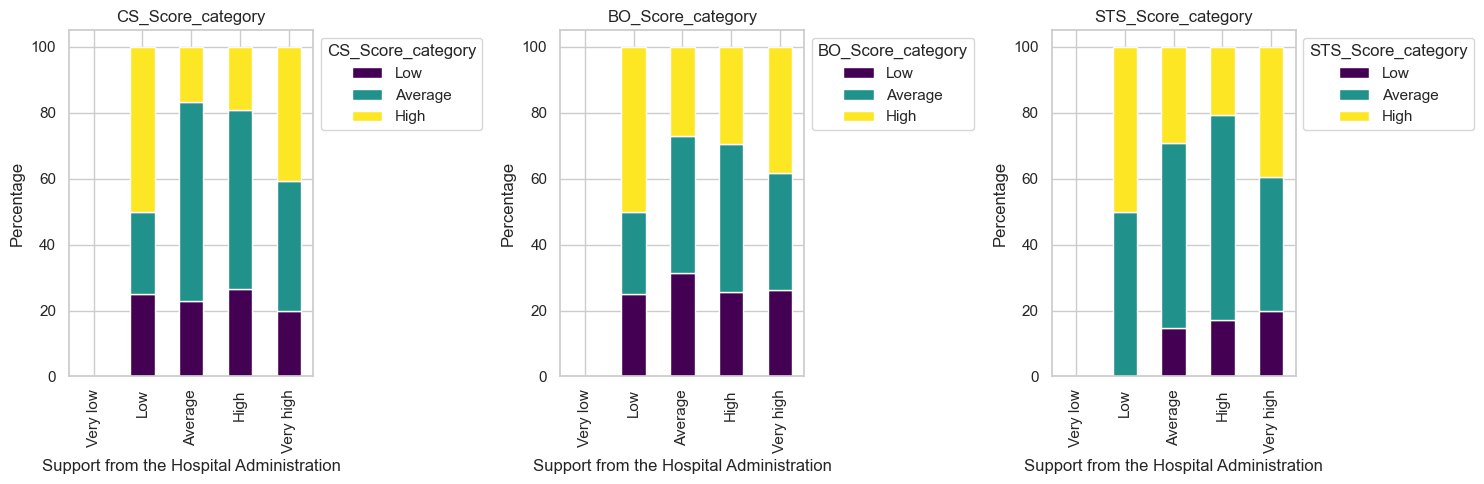

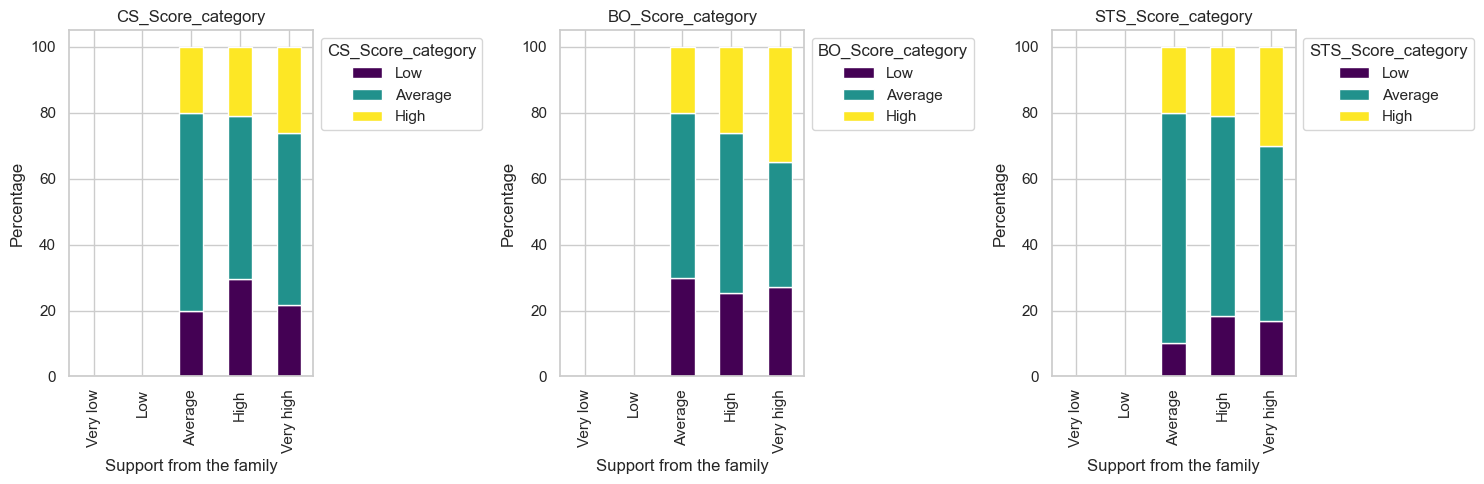

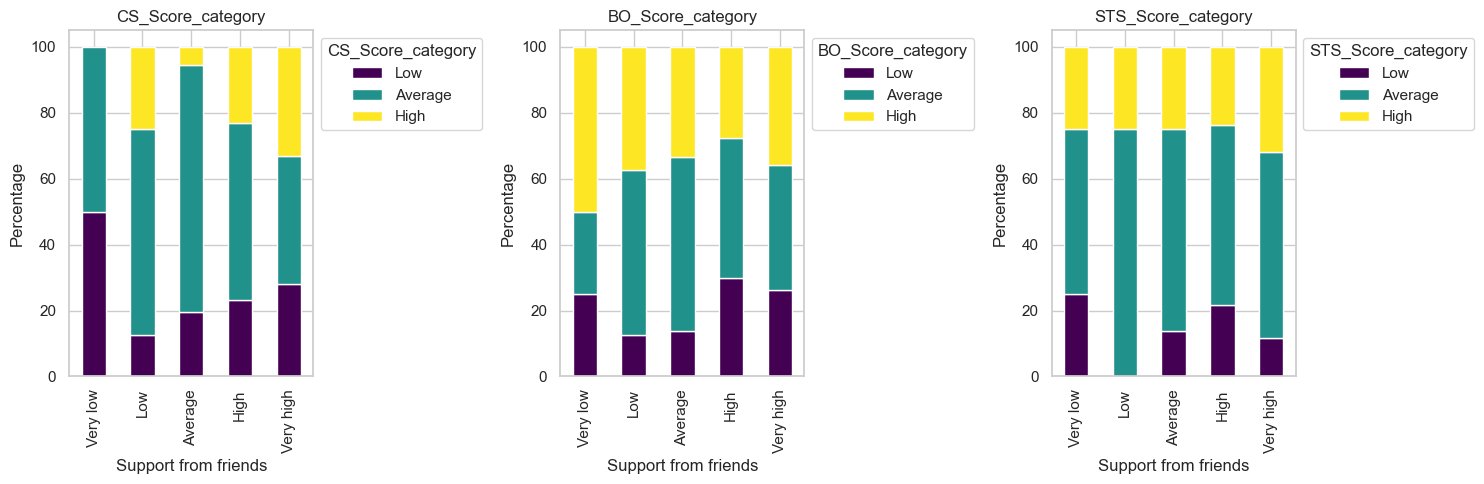

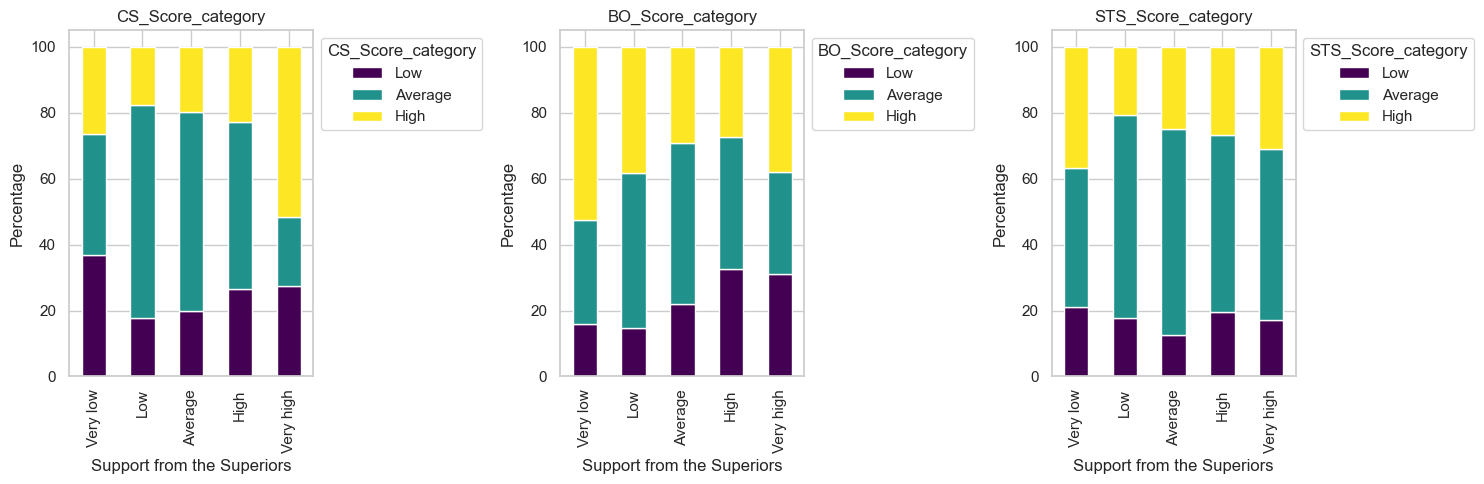

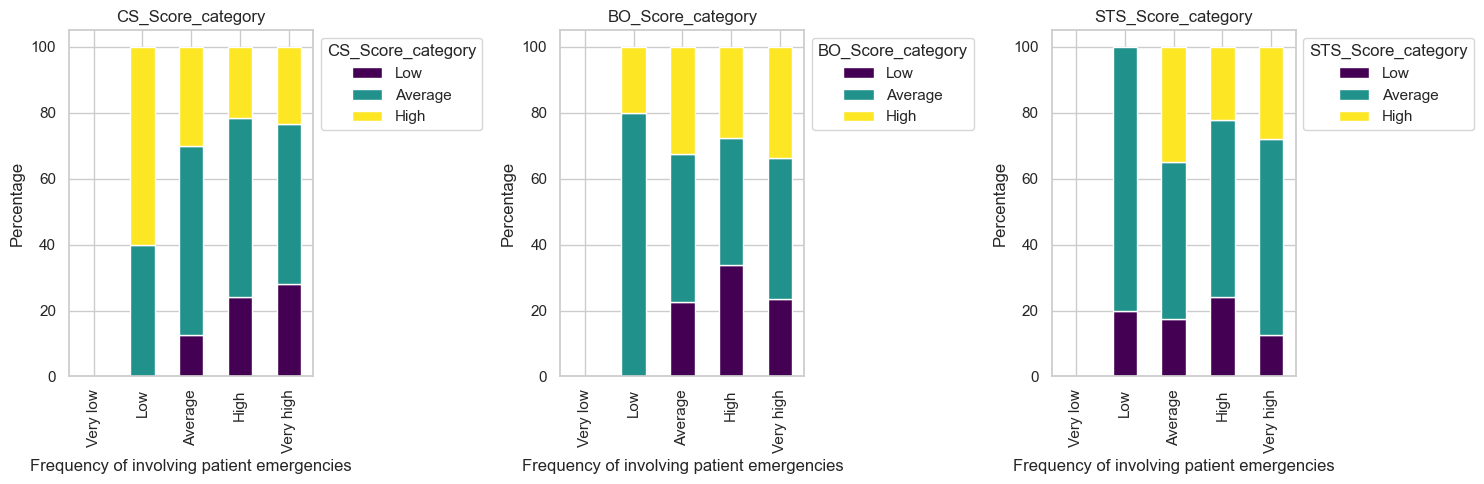

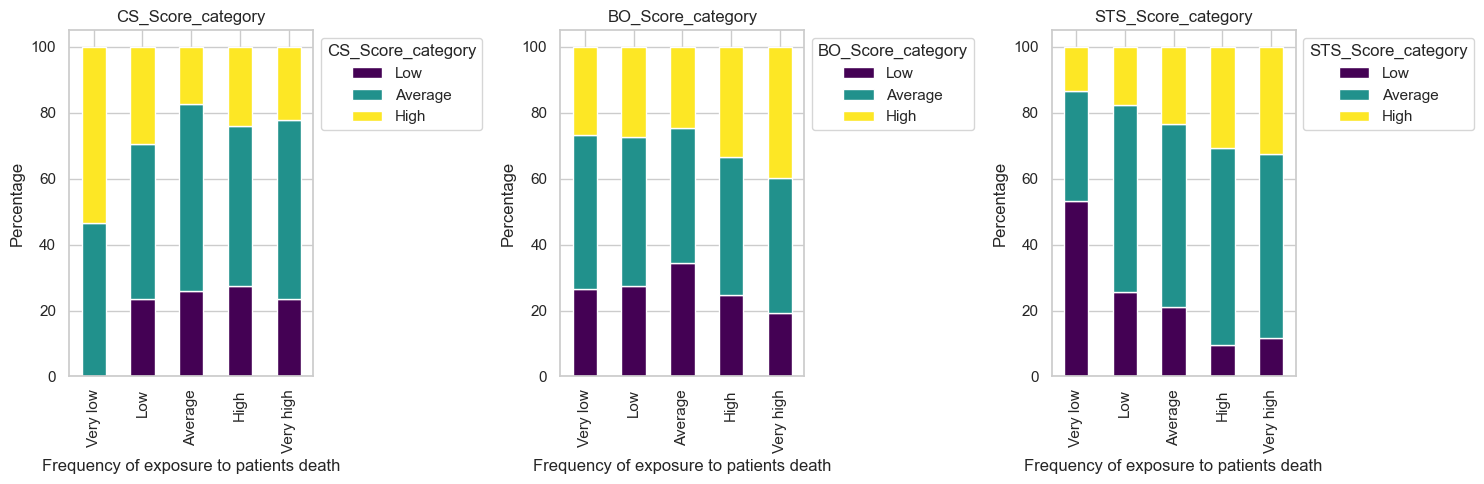

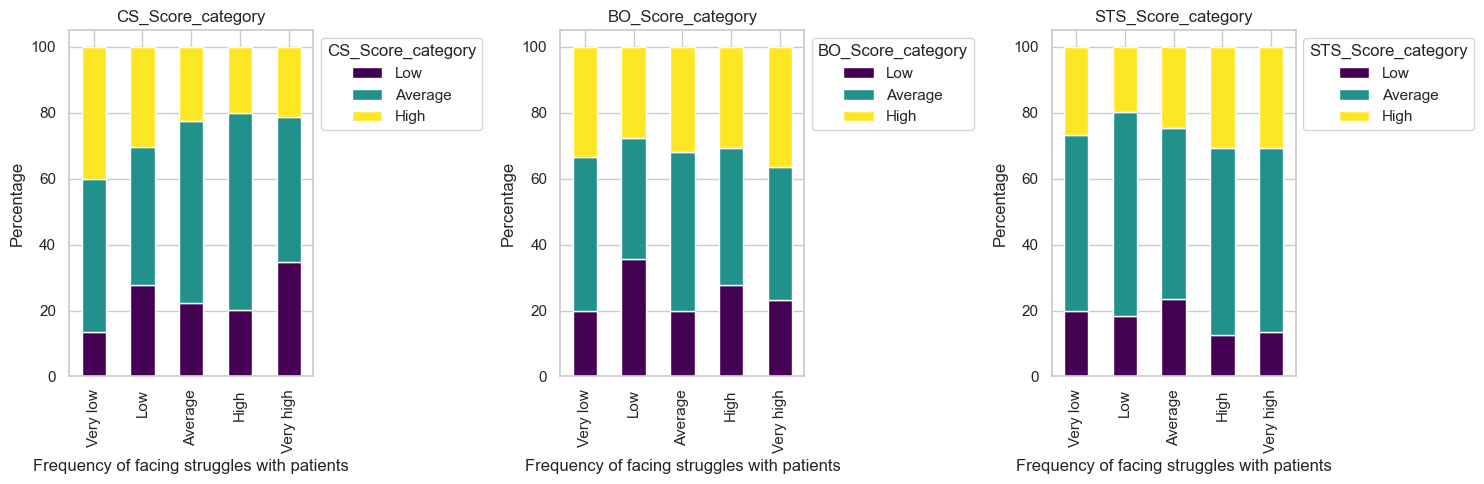

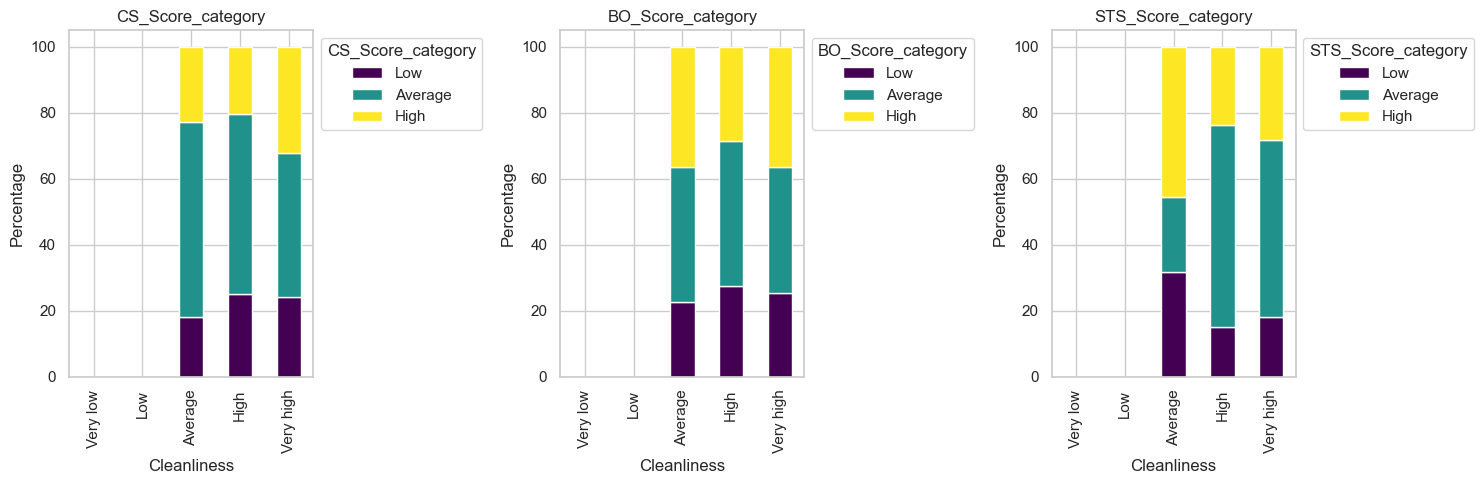

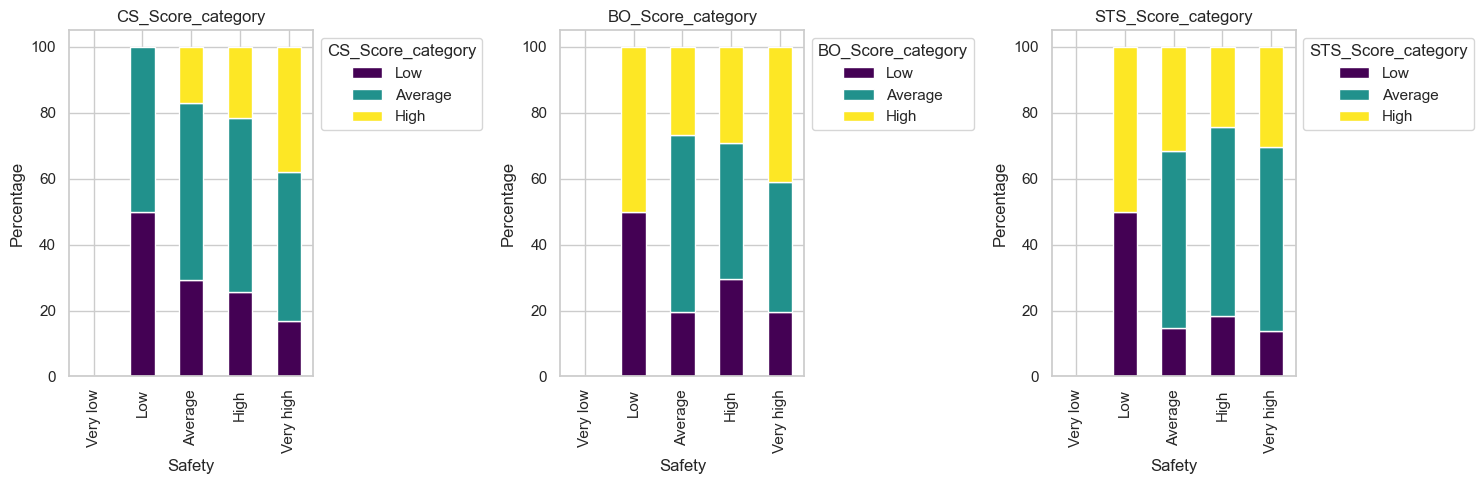

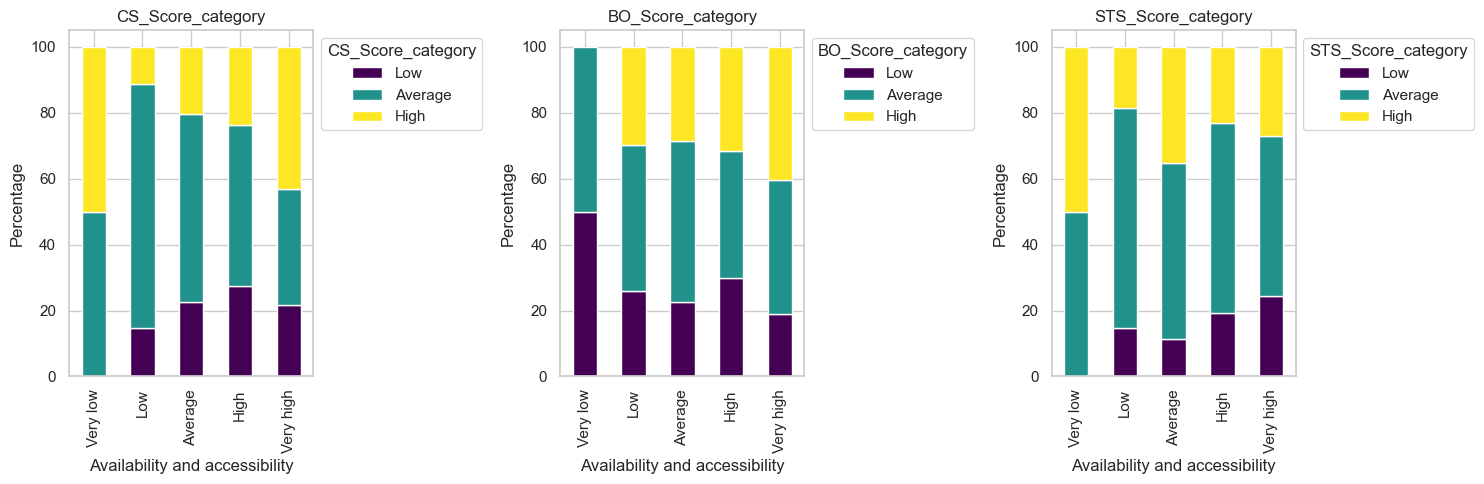

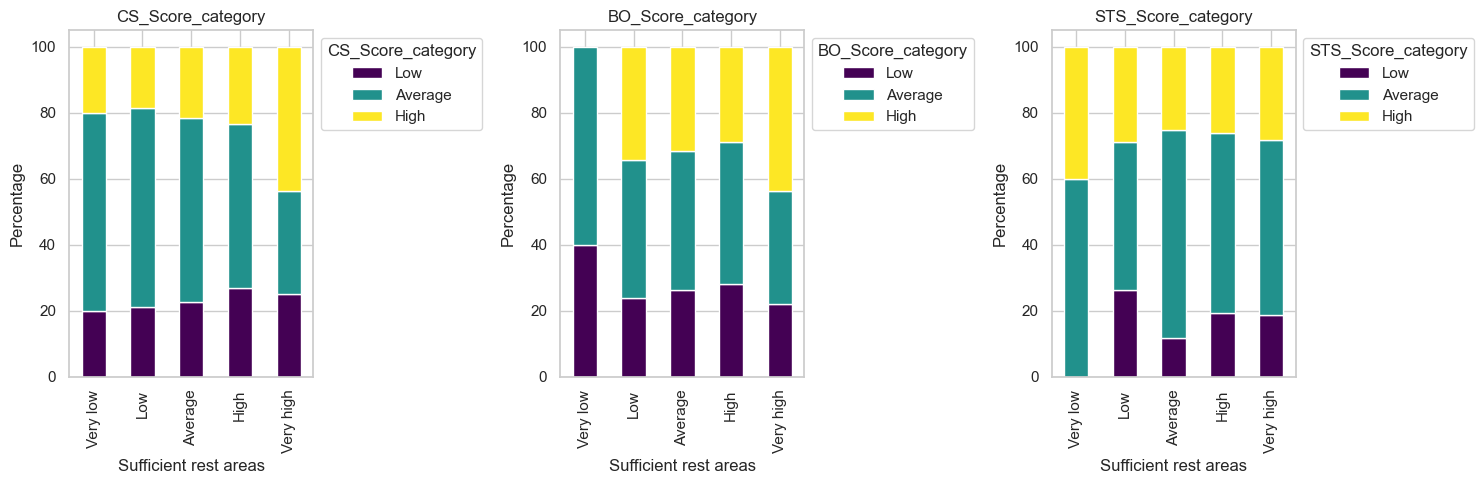

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.set(style="whitegrid")

# Define the order of levels
order = ['Low', 'Average', 'High']

# Loop through each ordinal predictor variable
for ordinal_variable in ordinal_variables:
    # Create a figure with subplots for each ordinal response variable
    fig, axes = plt.subplots(1, len(ordinal_response_variables), figsize=(15, 5))

    # Loop through each ordinal response variable
    for i, ordinal_response_variable in enumerate(ordinal_response_variables):
        # Create a pivot table
        pivot_table = df.groupby([ordinal_variable, ordinal_response_variable]).size().unstack().reindex(ordinal_variables_order[ordinal_variable])

        # Order the columns based on the specified order
        pivot_table = pivot_table[order]

        # Calculate percentages
        pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

        # Plot the ordered stacked bar chart in the corresponding subplot
        pivot_table_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[i])
        axes[i].set_title(f"{ordinal_response_variable}")
        axes[i].set_xlabel(ordinal_variable)
        axes[i].set_ylabel("Percentage")
        axes[i].legend(title=ordinal_response_variable, bbox_to_anchor=(1, 1))

    # Adjust layout and show the plots for each ordinal predictor variable
    plt.tight_layout()
    plt.show()
